In [1]:
import pandas as pd
from sqlite3 import connect

conn = connect(r"C:\Users\DELL\Desktop\UMBC Academic\Cap\Data\archive\FPA_FOD_20170508.sqlite")

In [2]:
conn

In [3]:

data = pd.read_sql(sql = """SELECT name FROM sqlite_master  
  WHERE type='table';""",con = conn )

In [4]:
data

name
0                      spatial_ref_sys
1                   spatialite_history
2                      sqlite_sequence
3                     geometry_columns
4                  spatial_ref_sys_aux
5               views_geometry_columns
6               virts_geometry_columns
7          geometry_columns_statistics
8    views_geometry_columns_statistics
9    virts_geometry_columns_statistics
10        geometry_columns_field_infos
11  views_geometry_columns_field_infos
12  virts_geometry_columns_field_infos
13               geometry_columns_time
14               geometry_columns_auth
15         views_geometry_columns_auth
16         virts_geometry_columns_auth
17                  sql_statements_log
18                        SpatialIndex
19                ElementaryGeometries
20                                 KNN
21                               Fires
22                     idx_Fires_Shape
23                idx_Fires_Shape_node
24               idx_Fires_Shape_rowid
25              idx_Fires_Shape_parent
26          NWCG_UnitIDActive_20170109

In [5]:
for table in data['name']:
    try:
        in_data = pd.read_sql(sql = 'select * from '+table, con = conn)
        if table != 'SpatialIndex':
            print(table,in_data.shape)
    except:
        pass

spatial_ref_sys (4924, 6)
spatialite_history (16, 7)
sqlite_sequence (3, 2)
geometry_columns (1, 6)
spatial_ref_sys_aux (4873, 12)
views_geometry_columns (0, 6)
virts_geometry_columns (0, 5)
geometry_columns_statistics (1, 8)
views_geometry_columns_statistics (0, 8)
virts_geometry_columns_statistics (0, 8)
geometry_columns_field_infos (0, 14)
views_geometry_columns_field_infos (0, 14)
virts_geometry_columns_field_infos (0, 14)
geometry_columns_time (1, 5)
geometry_columns_auth (1, 4)
views_geometry_columns_auth (0, 3)
virts_geometry_columns_auth (0, 3)
sql_statements_log (0, 7)
Fires (1880465, 39)
idx_Fires_Shape (1880465, 5)
idx_Fires_Shape_node (72263, 2)
idx_Fires_Shape_rowid (1880465, 2)
idx_Fires_Shape_parent (72262, 2)
NWCG_UnitIDActive_20170109 (5867, 13)


In [6]:
fires_data = pd.read_sql(sql = 'select * from Fires', con = conn)

#### Storing the raw/unprocessed data to the local disk

In [7]:
fires_data.to_csv('fires_data.csv',index=False)

### Data Cleaning/ Preprocessing

In [8]:
#fires_data = pd.read_csv('fires_data.csv')

In [9]:
fires_data.isna().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

Ommitting unncessary columns

In [10]:
fires_data.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [11]:
omitting_columns = ['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME']

In [12]:
fires_data.drop(omitting_columns,axis=1, inplace=True)

In [13]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891531
CONT_DOY            891531
CONT_TIME           972173
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY              678148
FIPS_CODE           678148
FIPS_NAME           678148
Shape                    0
dtype: int64

In [14]:
fires_data.dtypes

FIRE_YEAR             int64
DISCOVERY_DATE      float64
DISCOVERY_DOY         int64
DISCOVERY_TIME       object
STAT_CAUSE_CODE     float64
STAT_CAUSE_DESCR     object
CONT_DATE           float64
CONT_DOY            float64
CONT_TIME            object
FIRE_SIZE           float64
FIRE_SIZE_CLASS      object
LATITUDE            float64
LONGITUDE           float64
OWNER_CODE          float64
OWNER_DESCR          object
STATE                object
COUNTY               object
FIPS_CODE            object
FIPS_NAME            object
Shape                object
dtype: object

Converting float discovery date and contained date to standard date

In [15]:
from datetime import datetime
def julian_to_standard(julian_date):
    if pd.isna(julian_date):
        return pd.NA
    else:
        return datetime.fromordinal(int(julian_date) - 1721425).date()
fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'].apply(julian_to_standard))
fires_data['CONT_DATE'] = pd.to_datetime(fires_data['CONT_DATE'].apply(julian_to_standard))

In [16]:
fires_data['DISCOVERY_DATE']

0         2005-02-01
1         2004-05-11
2         2004-05-30
3         2004-06-27
4         2004-06-27
             ...    
1880460   2015-09-25
1880461   2015-10-04
1880462   2015-05-01
1880463   2015-10-13
1880464   2015-03-13
Name: DISCOVERY_DATE, Length: 1880465, dtype: datetime64[ns]

Extracting Month, weekday from the discovery date

In [17]:
fires_data['DISCOVERY_MONTH'] = fires_data['DISCOVERY_DATE'].dt.month

In [18]:
fires_data['DISCOVERY_DOW'] = fires_data['DISCOVERY_DATE'].dt.weekday

In [19]:
fires_data['DISCOVERY_TIME'] = pd.to_datetime(fires_data['DISCOVERY_TIME'], format='%H%M').dt.strftime('%H:%M:%S')# /'%I:%M %p'

In [20]:
fires_data['CONT_TIME'] = fires_data['CONT_TIME'].apply(lambda x:x if x!='' else pd.NA)

In [21]:
fires_data['CONT_TIME'] = pd.to_datetime(fires_data['CONT_TIME'], format='%H%M').dt.strftime('%H:%M:%S')# /'%I:%M %p'

In [22]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891531
CONT_DOY            891531
CONT_TIME           972553
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY              678148
FIPS_CODE           678148
FIPS_NAME           678148
Shape                    0
DISCOVERY_MONTH          0
DISCOVERY_DOW            0
dtype: int64

In [23]:
## Code used to fill the county names based on latitudes and longitudes which is saved as checkpoint.csv
'''
import geopandas as gpd
from shapely.geometry import Point

# Load the US county shapefile
counties_gdf = gpd.read_file(r"C:\Users\surya\Downloads\cb_2018_us_county_5m.shp")

# Example coordinates (replace with your actual data)
latitude = 40.017544
longitude = -105.283348

# Create a Point geometry from the coordinates
point = Point(longitude, latitude)

# Spatially query the county shapefile
county_info = counties_gdf[counties_gdf.geometry.contains(point)]

if not county_info.empty:
    county_name = county_info.iloc[0]["NAME"]
    print(f"County: {county_name}")
else:
    print("No county found for the given coordinates.")
    
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 125-126: truncated \UXXXXXXXX escape (984001986.py, line 25)

In [24]:
##Filling county names using the saved checkpoint
checkpoint = pd.read_csv("checkpoint.csv")

fires_data.loc[fires_data['FIPS_NAME'].isna(), 'FIPS_NAME'] = checkpoint.loc[fires_data['FIPS_NAME'].isna(), 'COUNTY_NAMES']

C:\Users\DELL\AppData\Local\Temp\ipykernel_8380\1435290662.py:2: DtypeWarning: Columns (4,6,7,8,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  checkpoint = pd.read_csv("checkpoint.csv")


In [25]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891531
CONT_DOY            891531
CONT_TIME           972553
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY              678148
FIPS_CODE           678148
FIPS_NAME              620
Shape                    0
DISCOVERY_MONTH          0
DISCOVERY_DOW            0
dtype: int64

In [26]:
fires_data.drop(['COUNTY'],axis=1,inplace=True)

In [27]:
fires_data.dropna(subset=['FIPS_NAME'],inplace=True)

In [28]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882522
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891355
CONT_DOY            891355
CONT_TIME           972329
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
FIPS_CODE           677528
FIPS_NAME                0
Shape                    0
DISCOVERY_MONTH          0
DISCOVERY_DOW            0
dtype: int64

Extracted duration_in_mins in time stamps from considering date and time from the fire occurances and containment

In [29]:
fires_data['CONT_TIME_STAMP'] = fires_data['CONT_DATE']+pd.to_timedelta(fires_data['CONT_TIME'])

In [30]:
fires_data['DISCOVERY_TIME_STAMP'] = fires_data['DISCOVERY_DATE']+pd.to_timedelta(fires_data['DISCOVERY_TIME'])

In [31]:
fires_data['DURATION_TIME_MINS'] = (fires_data['CONT_TIME_STAMP']-fires_data['DISCOVERY_TIME_STAMP']).dt.total_seconds()/60

In [32]:
fires_data['FIPS_CODE'] = fires_data.groupby('FIPS_NAME')['FIPS_CODE'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [33]:
fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          882522
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               891355
CONT_DOY                891355
CONT_TIME               972329
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                38446
FIPS_NAME                    0
Shape                        0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         972329
DISCOVERY_TIME_STAMP    882522
DURATION_TIME_MINS      988233
dtype: int64

In [34]:
fires_data.drop(['Shape'],axis=1, inplace=True)

fires_data.dropna(subset=['FIPS_CODE','FIPS_NAME'],inplace=True)

In [35]:
fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          856206
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               866903
CONT_DOY                866903
CONT_TIME               946057
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                    0
FIPS_NAME                    0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         946057
DISCOVERY_TIME_STAMP    856206
DURATION_TIME_MINS      961780
dtype: int64

In [36]:
fires_data[(fires_data['FIRE_SIZE']<=0.5) & (fires_data['DURATION_TIME_MINS']>=140)]

FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY DISCOVERY_TIME  \
0             2005     2005-02-01             33       13:00:00   
1             2004     2004-05-11            133       08:45:00   
3             2004     2004-06-27            180       16:00:00   
4             2004     2004-06-27            180       16:00:00   
5             2004     2004-06-29            182       18:00:00   
...            ...            ...            ...            ...   
1880430       2014     2014-05-28            149       19:00:00   
1880434       2015     2015-08-05            218       12:04:00   
1880437       2015     2015-05-10            131       16:45:00   
1880443       2015     2015-09-26            270       05:36:00   
1880448       2015     2015-06-25            177       17:52:00   

         STAT_CAUSE_CODE   STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY CONT_TIME  \
0                    9.0      Miscellaneous 2005-02-01      33.0  17:30:00   
1                    1.0          Lightning 2004-05-11     133.0  15:30:00   
3                    1.0          Lightning 2004-07-02     185.0  14:00:00   
4                    1.0          Lightning 2004-07-02     185.0  12:00:00   
5                    1.0          Lightning 2004-06-30     183.0  16:00:00   
...                  ...                ...        ...       ...       ...   
1880430             13.0  Missing/Undefined 2014-05-28     149.0  21:54:00   
1880434              1.0          Lightning 2015-08-05     218.0  19:35:00   
1880437              5.0     Debris Burning 2015-05-10     131.0  20:00:00   
1880443              2.0      Equipment Use 2015-09-26     270.0  08:55:00   
1880448              1.0          Lightning 2015-06-25     177.0  20:14:00   

         FIRE_SIZE  ... OWNER_CODE       OWNER_DESCR  STATE  FIPS_CODE  \
0             0.10  ...        5.0              USFS     CA        063   
1             0.25  ...        5.0              USFS     CA        061   
3             0.10  ...        5.0              USFS     CA        003   
4             0.10  ...        5.0              USFS     CA        003   
5             0.10  ...        5.0              USFS     CA        005   
...            ...  ...        ...               ...    ...        ...   
1880430       0.50  ...       13.0  STATE OR PRIVATE     CA        073   
1880434       0.50  ...       13.0  STATE OR PRIVATE     CA        007   
1880437       0.02  ...       13.0  STATE OR PRIVATE     CA        023   
1880443       0.16  ...       13.0  STATE OR PRIVATE     CA        035   
1880448       0.05  ...       13.0  STATE OR PRIVATE     CA        035   

         FIPS_NAME DISCOVERY_MONTH DISCOVERY_DOW     CONT_TIME_STAMP  \
0           Plumas               2             1 2005-02-01 17:30:00   
1           Placer               5             1 2004-05-11 15:30:00   
3           Alpine               6             6 2004-07-02 14:00:00   
4           Alpine               6             6 2004-07-02 12:00:00   
5           Amador               6             1 2004-06-30 16:00:00   
...            ...             ...           ...                 ...   
1880430  San Diego               5             2 2014-05-28 21:54:00   
1880434      Butte               8             2 2015-08-05 19:35:00   
1880437   Humboldt               5             6 2015-05-10 20:00:00   
1880443     Lassen               9             5 2015-09-26 08:55:00   
1880448     Lassen               6             3 2015-06-25 20:14:00   

         DISCOVERY_TIME_STAMP  DURATION_TIME_MINS  
0         2005-02-01 13:00:00               270.0  
1         2004-05-11 08:45:00               405.0  
3         2004-06-27 16:00:00              7080.0  
4         2004-06-27 16:00:00              6960.0  
5         2004-06-29 18:00:00              1320.0  
...                       ...                 ...  
1880430   2014-05-28 19:00:00               174.0  
1880434   2015-08-05 12:04:00               451.0  
1880437   2015-05-10 16:45:00               1

In [37]:
fires_data['DURATION_TIME_HRS'] = (fires_data['CONT_TIME_STAMP']-fires_data['DISCOVERY_TIME_STAMP']).dt.total_seconds()/3600

In [38]:
fires_data.head()

FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY DISCOVERY_TIME  STAT_CAUSE_CODE  \
0       2005     2005-02-01             33       13:00:00              9.0   
1       2004     2004-05-11            133       08:45:00              1.0   
2       2004     2004-05-30            152       19:21:00              5.0   
3       2004     2004-06-27            180       16:00:00              1.0   
4       2004     2004-06-27            180       16:00:00              1.0   

  STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY CONT_TIME  FIRE_SIZE  ...  \
0    Miscellaneous 2005-02-01      33.0  17:30:00       0.10  ...   
1        Lightning 2004-05-11     133.0  15:30:00       0.25  ...   
2   Debris Burning 2004-05-30     152.0  20:24:00       0.10  ...   
3        Lightning 2004-07-02     185.0  14:00:00       0.10  ...   
4        Lightning 2004-07-02     185.0  12:00:00       0.10  ...   

        OWNER_DESCR  STATE  FIPS_CODE  FIPS_NAME DISCOVERY_MONTH  \
0              USFS     CA        063     Plumas               2   
1              USFS     CA        061     Placer               5   
2  STATE OR PRIVATE     CA        017  El Dorado               5   
3              USFS     CA        003     Alpine               6   
4              USFS     CA        003     Alpine               6   

  DISCOVERY_DOW     CONT_TIME_STAMP DISCOVERY_TIME_STAMP  DURATION_TIME_MINS  \
0             1 2005-02-01 17:30:00  2005-02-01 13:00:00               270.0   
1             1 2004-05-11 15:30:00  2004-05-11 08:45:00               405.0   
2             6 2004-05-30 20:24:00  2004-05-30 19:21:00                63.0   
3             6 2004-07-02 14:00:00  2004-06-27 16:00:00              7080.0   
4             6 2004-07-02 12:00:00  2004-06-27 16:00:00              6960.0   

   DURATION_TIME_HRS  
0               4.50  
1               6.75  
2               1.05  
3             118.00  
4             116.00  

[5 rows x 24 columns]

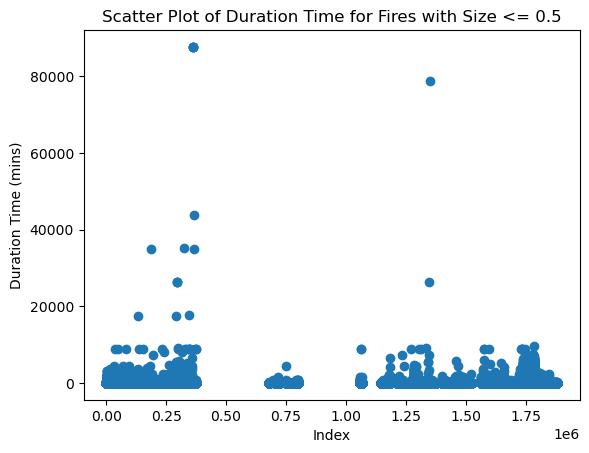

In [39]:

import matplotlib.pyplot as plt
filtered_data = fires_data[fires_data['FIRE_SIZE'] <= 0.5]

plt.scatter(x=filtered_data.index, y=filtered_data['DURATION_TIME_HRS'])

plt.xlabel('Index')
plt.ylabel('Duration Time (mins)')
plt.title('Scatter Plot of Duration Time for Fires with Size <= 0.5')
plt.show()

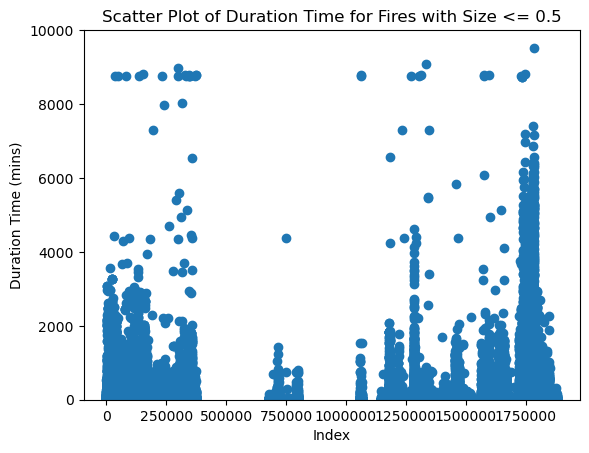

In [40]:
filtered_data = fires_data[fires_data['FIRE_SIZE'] <= 0.5]
plt.scatter(x=filtered_data.index, y=filtered_data['DURATION_TIME_HRS'])
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('Index')
plt.ylabel('Duration Time (mins)')
plt.ylim(0,10000)
plt.title('Scatter Plot of Duration Time for Fires with Size <= 0.5')
plt.show()

removing all the 'Miscellaneous' and 'Missing/Undefined' rows from the data

In [41]:
new_fires_data = fires_data[(fires_data['STAT_CAUSE_DESCR']!='Miscellaneous')&(fires_data['STAT_CAUSE_DESCR']!='Missing/Undefined')]

In [42]:
new_fires_data.shape

(1374303, 24)

In [43]:
new_fires_data['FIRE_SIZE'].max()

606945.0

In [44]:
new_fires_data[new_fires_data['FIRE_SIZE']>=50000]

FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY DISCOVERY_TIME  \
5008          2005     2005-05-28            149       19:15:00   
5095          2004     2004-05-14            136       12:50:00   
6808          2005     2005-07-15            197       19:09:00   
11658         2006     2006-06-18            170       11:00:00   
11746         2006     2006-06-07            159       18:23:00   
...            ...            ...            ...            ...   
1804814       2015     2015-06-18            170       15:30:00   
1804864       2015     2015-06-21            173       20:00:00   
1804889       2015     2015-06-22            174       19:00:00   
1804899       2015     2015-06-20            172       16:45:00   
1804903       2015     2015-06-20            172       11:15:00   

         STAT_CAUSE_CODE STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY CONT_TIME  \
5008                 1.0        Lightning 2005-10-14     288.0  18:00:00   
5095                 1.0        Lightning        NaT       NaN       NaN   
6808                 1.0        Lightning 2005-07-23     205.0  19:00:00   
11658                4.0         Campfire 2006-08-22     235.0  07:30:00   
11746                1.0        Lightning 2006-08-08     221.0  07:00:00   
...                  ...              ...        ...       ...       ...   
1804814              1.0        Lightning 2015-06-27     179.0  16:30:00   
1804864              1.0        Lightning 2015-06-29     181.0  23:45:00   
1804889              1.0        Lightning 2015-07-09     191.0  18:45:00   
1804899              1.0        Lightning 2015-09-28     272.0  14:15:00   
1804903              1.0        Lightning 2015-09-28     272.0  14:15:00   

         FIRE_SIZE  ... OWNER_DESCR  STATE  FIPS_CODE      FIPS_NAME  \
5008       77000.0  ...        USFS     NM        003         Catron   
5095       64488.0  ...        USFS     NM        027        Lincoln   
6808       72000.0  ...        USFS     AZ        013       Maricopa   
11658      55307.0  ...        USFS     NM        003         Catron   
11746      58630.0  ...        USFS     AZ        005       Coconino   
...            ...  ...         ...    ...        ...            ...   
1804814    54503.0  ...         FWS     AK        290  Yukon-Koyukuk   
1804864    55704.0  ...         BLM     AK        050         Bethel   
1804889    52108.5  ...       STATE     AK        290  Yukon-Koyukuk   
1804899   112806.8  ...         FWS     AK        290  Yukon-Koyukuk   
1804903   276038.1  ...         BLM     AK        290  Yukon-Koyukuk   

        DISCOVERY_MONTH DISCOVERY_DOW     CONT_TIME_STAMP  \
5008                  5             5 2005-10-14 18:00:00   
5095                  5             4                 NaT   
6808                  7             4 2005-07-23 19:00:00   
11658                 6             6 2006-08-22 07:30:00   
11746                 6             2 2006-08-08 07:00:00   
...                 ...           ...                 ...   
1804814               6             3 2015-06-27 16:30:00   
1804864               6             6 2015-06-29 23:45:00   
1804889               6             0 2015-07-09 18:45:00   
1804899               6             5 2015-09-28 14:15:00   
1804903               6             5 2015-09-28 14:15:00   

        DISCOVERY_TIME_STAMP  DURATION_TIME_MINS  DURATION_TIME_HRS  
5008     2005-05-28 19:15:00            200085.0        3334.750000  
5095     2004-05-14 12:50:00                 NaN                NaN  
6808     2005-07-15 19:09:00             11511.0         191.850000  
11658    2006-06-18 11:00:00             93390.0        1556.500000  
11746    2006-06-07 18:23:00             88597.0        1476.616667  
...                      ...                 ...                ...  
1804814  2015-06-18 15:30:00             13020.0         217.000000  
1804864  2015-06-21 20:00:00             11745.0         195.750000  
1804889  2015-06-22 19:00:00             24465.0         407.75

Removing 384 rows which are of fire size being more than 50000, which are considered as outliers as their presence(in-terms of nummber of instances) is very less and statistically the variance is much higher from the median of the fire_size data

In [45]:
new_fires_data = new_fires_data[new_fires_data['FIRE_SIZE']<50000]

In [46]:
new_fires_data.shape

(1373919, 24)

In [47]:
fires_data['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       423978
Miscellaneous        321220
Arson                280746
Lightning            276921
Equipment Use        146162
Missing/Undefined    145876
Campfire              75030
Children              59111
Smoking               52340
Railroad              33221
Powerline             14018
Fireworks              9814
Structure              2962
Name: STAT_CAUSE_DESCR, dtype: int64

In [48]:
fires_data[fires_data['FIRE_SIZE']>50000]['STAT_CAUSE_DESCR'].value_counts()

Lightning            330
Miscellaneous         32
Missing/Undefined     22
Arson                 17
Campfire              14
Equipment Use         14
Debris Burning         3
Railroad               2
Powerline              2
Smoking                1
Structure              1
Name: STAT_CAUSE_DESCR, dtype: int64

Majority of the largest wildfires are due to Lightning

In [49]:
new_fires_data[new_fires_data['DURATION_TIME_HRS']>1000]

FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY DISCOVERY_TIME  \
1505          2005     2005-05-28            149       15:05:00   
2468          2005     2005-08-09            222       09:07:00   
2502          2005     2005-08-09            222       14:44:00   
2558          2005     2005-08-09            222       14:07:00   
2573          2005     2005-08-09            222       12:51:00   
...            ...            ...            ...            ...   
1827991       2015     2015-04-07             98       14:00:00   
1828999       2015     2015-08-20            233       10:30:00   
1836608       2015     2015-08-06            219       15:35:00   
1838145       2015     2015-08-04            217       16:30:00   
1877399       2014     2014-08-09            222       14:59:00   

         STAT_CAUSE_CODE STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY CONT_TIME  \
1505                 1.0        Lightning 2005-08-28     241.0  11:59:00   
2468                 1.0        Lightning 2005-09-23     267.0  08:00:00   
2502                 1.0        Lightning 2005-09-23     267.0  08:00:00   
2558                 1.0        Lightning 2005-09-23     267.0  08:00:00   
2573                 1.0        Lightning 2005-09-24     268.0  08:00:00   
...                  ...              ...        ...       ...       ...   
1827991              5.0   Debris Burning 2015-09-21     265.0  13:38:00   
1828999              5.0   Debris Burning 2015-10-28     302.0  12:10:00   
1836608              7.0            Arson 2015-09-28     272.0  12:00:00   
1838145              8.0         Children 2015-09-28     272.0  11:59:00   
1877399              1.0        Lightning 2014-11-04     309.0  08:00:00   

         FIRE_SIZE  ...            OWNER_DESCR  STATE  FIPS_CODE  FIPS_NAME  \
1505      11936.00  ...                   USFS     NM        003     Catron   
2468          0.10  ...                   USFS     ID        049      Idaho   
2502          1.00  ...                   USFS     ID        049      Idaho   
2558          2.00  ...                   USFS     ID        049      Idaho   
2573          0.30  ...                   USFS     ID        049      Idaho   
...            ...  ...                    ...    ...        ...        ...   
1827991      48.40  ...                PRIVATE     WA        047   Okanogan   
1828999       0.75  ...                PRIVATE     WA        047   Okanogan   
1836608       0.25  ...                PRIVATE     NJ        029      Ocean   
1838145       0.25  ...                PRIVATE     NJ        029      Ocean   
1877399       1.00  ...  MISSING/NOT SPECIFIED     CA        089     Shasta   

        DISCOVERY_MONTH DISCOVERY_DOW     CONT_TIME_STAMP  \
1505                  5             5 2005-08-28 11:59:00   
2468                  8             1 2005-09-23 08:00:00   
2502                  8             1 2005-09-23 08:00:00   
2558                  8             1 2005-09-23 08:00:00   
2573                  8             1 2005-09-24 08:00:00   
...                 ...           ...                 ...   
1827991               4             1 2015-09-21 13:38:00   
1828999               8             3 2015-10-28 12:10:00   
1836608               8             3 2015-09-28 12:00:00   
1838145               8             1 2015-09-28 11:59:00   
1877399               8             5 2014-11-04 08:00:00   

        DISCOVERY_TIME_STAMP  DURATION_TIME_MINS  DURATION_TIME_HRS  
1505     2005-05-28 15:05:00            132294.0        2204.900000  
2468     2005-08-09 09:07:00             64733.0        1078.883333  
2502     2005-08-09 14:44:00             64396.0        1073.266667  
2558     2005-08-09 14:07:00             64433.0        1073.883333  
2573     2005-08-09 12:51:00             65949.0        1099.150000  
...                      ...                 ...                ...  
1827991  2015-04-07 14:00:00            240458.0        4007.633333  
1828999  2015-08-20 10:30:00             99460.0 

In [50]:
fires_data['FIRE_SIZE'].std()

2470.5118804584445

In [51]:
new_fires_data['FIRE_SIZE'].std()

814.6013865670291

In [52]:
#checking for the standard deviation
fires_data['DURATION_TIME_HRS'].std()

332.90896366171813

In [53]:
new_fires_data[((new_fires_data['FIRE_SIZE']<=0.5) & (new_fires_data['DURATION_TIME_HRS']<2160))]

FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY DISCOVERY_TIME  \
1             2004     2004-05-11            133       08:45:00   
2             2004     2004-05-30            152       19:21:00   
3             2004     2004-06-27            180       16:00:00   
4             2004     2004-06-27            180       16:00:00   
5             2004     2004-06-29            182       18:00:00   
...            ...            ...            ...            ...   
1880434       2015     2015-08-05            218       12:04:00   
1880436       2015     2015-03-20             80       11:38:00   
1880437       2015     2015-05-10            131       16:45:00   
1880443       2015     2015-09-26            270       05:36:00   
1880448       2015     2015-06-25            177       17:52:00   

         STAT_CAUSE_CODE STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY CONT_TIME  \
1                    1.0        Lightning 2004-05-11     133.0  15:30:00   
2                    5.0   Debris Burning 2004-05-30     152.0  20:24:00   
3                    1.0        Lightning 2004-07-02     185.0  14:00:00   
4                    1.0        Lightning 2004-07-02     185.0  12:00:00   
5                    1.0        Lightning 2004-06-30     183.0  16:00:00   
...                  ...              ...        ...       ...       ...   
1880434              1.0        Lightning 2015-08-05     218.0  19:35:00   
1880436              5.0   Debris Burning 2015-03-20      80.0  11:52:00   
1880437              5.0   Debris Burning 2015-05-10     131.0  20:00:00   
1880443              2.0    Equipment Use 2015-09-26     270.0  08:55:00   
1880448              1.0        Lightning 2015-06-25     177.0  20:14:00   

         FIRE_SIZE  ...       OWNER_DESCR  STATE  FIPS_CODE  FIPS_NAME  \
1             0.25  ...              USFS     CA        061     Placer   
2             0.10  ...  STATE OR PRIVATE     CA        017  El Dorado   
3             0.10  ...              USFS     CA        003     Alpine   
4             0.10  ...              USFS     CA        003     Alpine   
5             0.10  ...              USFS     CA        005     Amador   
...            ...  ...               ...    ...        ...        ...   
1880434       0.50  ...  STATE OR PRIVATE     CA        007      Butte   
1880436       0.01  ...  STATE OR PRIVATE     CA        057     Nevada   
1880437       0.02  ...  STATE OR PRIVATE     CA        023   Humboldt   
1880443       0.16  ...  STATE OR PRIVATE     CA        035     Lassen   
1880448       0.05  ...  STATE OR PRIVATE     CA        035     Lassen   

        DISCOVERY_MONTH DISCOVERY_DOW     CONT_TIME_STAMP  \
1                     5             1 2004-05-11 15:30:00   
2                     5             6 2004-05-30 20:24:00   
3                     6             6 2004-07-02 14:00:00   
4                     6             6 2004-07-02 12:00:00   
5                     6             1 2004-06-30 16:00:00   
...                 ...           ...                 ...   
1880434               8             2 2015-08-05 19:35:00   
1880436               3             4 2015-03-20 11:52:00   
1880437               5             6 2015-05-10 20:00:00   
1880443               9             5 2015-09-26 08:55:00   
1880448               6             3 2015-06-25 20:14:00   

        DISCOVERY_TIME_STAMP  DURATION_TIME_MINS  DURATION_TIME_HRS  
1        2004-05-11 08:45:00               405.0           6.750000  
2        2004-05-30 19:21:00                63.0           1.050000  
3        2004-06-27 16:00:00              7080.0         118.000000  
4        2004-06-27 16:00:00              6960.0         116.000000  
5        2004-06-29 18:00:00              1320.0          22.000000  
...                      ...                 ...                ...  
1880434  2015-08-05 12:04:00               451.0           7.516667  
1880436  2015-03-20 11:38:00                14.0           0.233333  
1880437  2015-05-10 16:45:00           

removing all the fire information which is of size less than 0.5 hectares and took more than 3 months to contain

In [54]:
new_fires_data = new_fires_data[((new_fires_data['FIRE_SIZE']<=0.5) & (new_fires_data['DURATION_TIME_HRS']<=2160)) | (new_fires_data['FIRE_SIZE']>0.5)]

In [55]:
new_fires_data.shape

(1124943, 24)

In [56]:
new_fires_data['DURATION_TIME_HRS'].std()

211.96816093102854

In [57]:
new_fires_data.shape

(1124943, 24)

removing the fire info, in which it took more than 6 moths to contain

In [58]:
 new_fires_data = new_fires_data[(new_fires_data['DURATION_TIME_HRS']<=5000) | (new_fires_data['DURATION_TIME_HRS'].isna())]

In [59]:
new_fires_data.shape

(1124884, 24)

#### Filling null values in DURATION_TIME_HRS

In [60]:
fires_data['STATE'].value_counts()

CA    189423
GA    168861
TX    141889
NC    111235
FL     90248
SC     81314
NY     80853
MS     79186
AZ     71585
AL     66563
OR     61084
MN     44762
OK     43072
MT     38892
NM     37411
ID     36698
CO     34139
WA     33471
WI     31856
AR     31657
TN     31154
UT     30725
LA     29986
KY     27089
NJ     25949
SD     23895
WV     21967
VA     21732
MO     17953
NV     16956
ND     15187
WY     14166
ME     13145
MI     10485
HI      9889
PA      8710
KS      7644
AK      7049
NE      5619
CT      4976
IA      4118
MD      3607
OH      3453
MA      2614
NH      2452
IL      2310
PR      1775
IN      1517
RI       479
VT       456
DE       143
Name: STATE, dtype: int64

In [61]:
fires_data[fires_data['CONT_DATE'].isna()]['STATE'].value_counts()

TX    127813
CA     97606
NC     85195
GA     69626
FL     68323
SC     46984
MS     36781
AL     35506
LA     26708
MN     25432
NJ     22128
AR     21497
VA     17874
WI     16963
TN     16407
KY     13972
OK     12735
WA     12144
NY     11920
MO     11013
SD     10477
HI      9729
NM      9425
ID      6036
CO      5815
AZ      5231
WV      4393
UT      4139
PA      4126
MT      3806
CT      3747
MD      2681
ME      2673
MI      2522
NH      2065
OH      1939
NE      1806
WY      1760
PR      1561
AK      1404
ND       968
KS       949
IA       851
IL       546
IN       463
MA       361
OR       336
VT       196
RI       113
NV        81
DE        77
Name: STATE, dtype: int64

In [62]:
## for report/paper

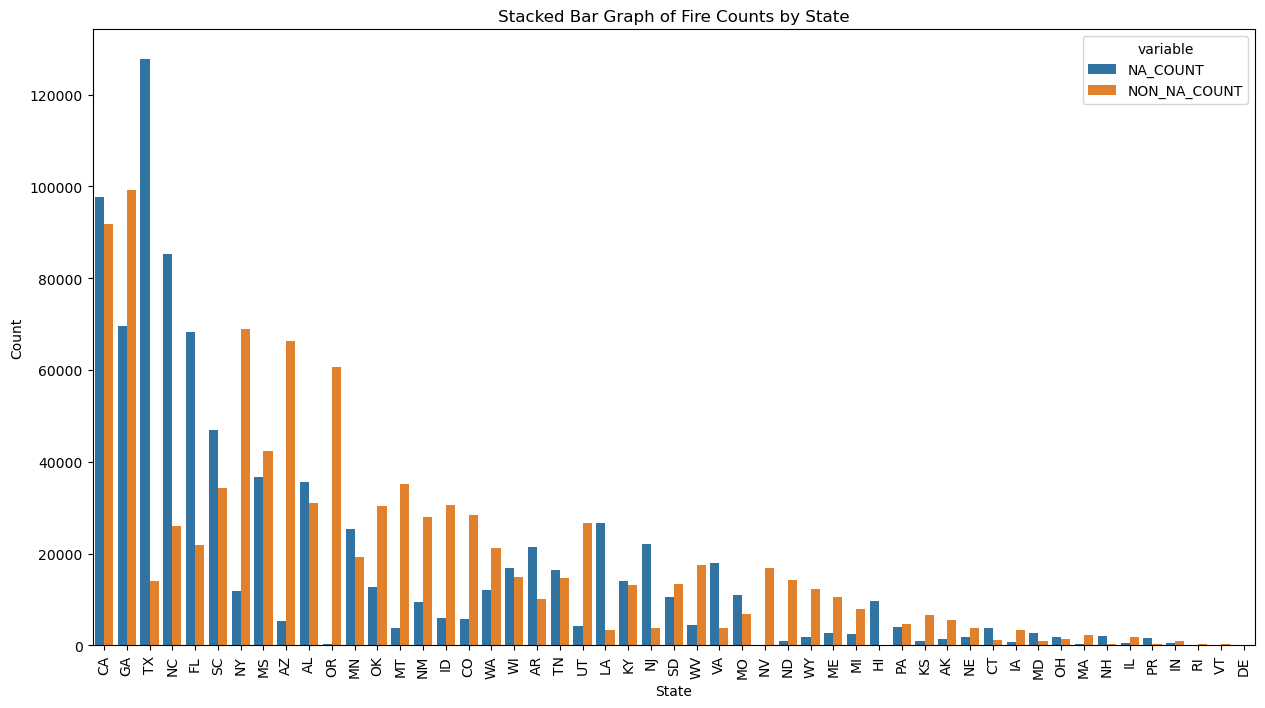

In [63]:
import seaborn as sns

total_counts = fires_data['STATE'].value_counts()
na_counts = fires_data[fires_data['CONT_DATE'].isna()]['STATE'].value_counts()
total_counts_df = total_counts.reset_index()
na_counts_df = na_counts.reset_index()
total_counts_df.columns = ['STATE', 'TOTAL_COUNT']
na_counts_df.columns = ['STATE', 'NA_COUNT']


merged_df = pd.merge(total_counts_df, na_counts_df, on='STATE', how='outer')


merged_df.fillna(0, inplace=True)


merged_df['NON_NA_COUNT'] = merged_df['TOTAL_COUNT'] - merged_df['NA_COUNT']


melted_df = pd.melt(merged_df, id_vars='STATE', value_vars=['NA_COUNT', 'NON_NA_COUNT'])
plt.figure(figsize=(15, 8))
sns.barplot(x='STATE', y='value', hue='variable', data=melted_df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Fire Counts by State')
plt.show()

In [64]:
group_means = new_fires_data.groupby(['FIRE_SIZE_CLASS', 'STAT_CAUSE_CODE', 'STATE', 'FIPS_CODE'])['DURATION_TIME_HRS'].transform('mean')
new_fires_data['DURATION_TIME_HRS'].fillna(group_means,inplace=True)

In [65]:
new_fires_data.dropna(subset=['DURATION_TIME_HRS'],inplace=True)

In [66]:
new_fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          304602
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               328077
CONT_DOY                328077
CONT_TIME               342971
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                    0
FIPS_NAME                    0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         342971
DISCOVERY_TIME_STAMP    304602
DURATION_TIME_MINS      343814
DURATION_TIME_HRS            0
dtype: int64

In [67]:
new_fires_data.shape

(1041925, 24)

In [68]:
new_fires_data.drop(['DURATION_TIME_MINS','CONT_DOY'], axis=1, inplace=True)

In [69]:
new_fires_data.shape

(1041925, 22)

In [70]:
new_fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          304602
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               328077
CONT_TIME               342971
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                    0
FIPS_NAME                    0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         342971
DISCOVERY_TIME_STAMP    304602
DURATION_TIME_HRS            0
dtype: int64

In [71]:
new_fires_data.head().T

1                    2  \
FIRE_YEAR                            2004                 2004   
DISCOVERY_DATE        2004-05-11 00:00:00  2004-05-30 00:00:00   
DISCOVERY_DOY                         133                  152   
DISCOVERY_TIME                   08:45:00             19:21:00   
STAT_CAUSE_CODE                       1.0                  5.0   
STAT_CAUSE_DESCR                Lightning       Debris Burning   
CONT_DATE             2004-05-11 00:00:00  2004-05-30 00:00:00   
CONT_TIME                        15:30:00             20:24:00   
FIRE_SIZE                            0.25                  0.1   
FIRE_SIZE_CLASS                         A                    A   
LATITUDE                        38.933056            38.984167   
LONGITUDE                     -120.404444          -120.735556   
OWNER_CODE                            5.0                 13.0   
OWNER_DESCR                          USFS     STATE OR PRIVATE   
STATE                                  CA                   CA   
FIPS_CODE                             061                  017   
FIPS_NAME                          Placer            El Dorado   
DISCOVERY_MONTH                         5                    5   
DISCOVERY_DOW                           1                    6   
CONT_TIME_STAMP       2004-05-11 15:30:00  2004-05-30 20:24:00   
DISCOVERY_TIME_STAMP  2004-05-11 08:45:00  2004-05-30 19:21:00   
DURATION_TIME_HRS                    6.75                 1.05   

                                        3                    4  \
FIRE_YEAR                            2004                 2004   
DISCOVERY_DATE        2004-06-27 00:00:00  2004-06-27 00:00:00   
DISCOVERY_DOY                         180                  180   
DISCOVERY_TIME                   16:00:00             16:00:00   
STAT_CAUSE_CODE                       1.0                  1.0   
STAT_CAUSE_DESCR                Lightning            Lightning   
CONT_DATE             2004-07-02 00:00:00  2004-07-02 00:00:00   
CONT_TIME                        14:00:00             12:00:00   
FIRE_SIZE                             0.1                  0.1   
FIRE_SIZE_CLASS                         A                    A   
LATITUDE                        38.559167            38.559167   
LONGITUDE                     -119.913333          -119.933056   
OWNER_CODE                            5.0                  5.0   
OWNER_DESCR                          USFS                 USFS   
STATE                                  CA                   CA   
FIPS_CODE                             003                  003   
FIPS_NAME                          Alpine               Alpine   
DISCOVERY_MONTH                         6                    6   
DISCOVERY_DOW                           6                    6   
CONT_TIME_STAMP       2004-07-02 14:00:00  2004-07-02 12:00:00   
DISCOVERY_TIME_STAMP  2004-06-27 16:00:00  2004-06-27 16:00:00   
DURATION_TIME_HRS                   118.0                116.0   

                                        5  
FIRE_YEAR                            2004  
DISCOVERY_DATE        2004-06-29 00:00:00  
DISCOVERY_DOY                         182  
DISCOVERY_TIME                   18:00:00  
STAT_CAUSE_CODE                       1.0  
STAT_CAUSE_DESCR                Lightning  
CONT_DATE             2004-06-30 00:00:00  
CONT_TIME                        16:00:00  
FIRE_SIZE                             0.1  
FIRE_SIZE_CLASS                         A  
LATITUDE                        38.635278  
LONGITUDE                     -120.103611  
OWNER_CODE                            5.0  
OWNER_DESCR                          USFS  
STATE                                  CA  
FIPS_CODE                             005  
FIPS_NAME                          Amador  
DISCOVERY_MONTH                         6  
DISCOVERY_DOW                           1  
CONT_TIME_STAMP       2004-06-30 16:00:00  
DISCOVERY_TIME_STAMP  2004-06-29 18:00:00  
DURATION_TIME_HRS                 

removing the info on contained date, as it is not useful fo rthe proposed model building

In [72]:
new_fires_data.drop(['CONT_DATE','CONT_TIME','CONT_TIME_STAMP','DISCOVERY_TIME_STAMP'],axis=1, inplace=True)

In [73]:
new_fires_data.isna().sum()

FIRE_YEAR                 0
DISCOVERY_DATE            0
DISCOVERY_DOY             0
DISCOVERY_TIME       304602
STAT_CAUSE_CODE           0
STAT_CAUSE_DESCR          0
FIRE_SIZE                 0
FIRE_SIZE_CLASS           0
LATITUDE                  0
LONGITUDE                 0
OWNER_CODE                0
OWNER_DESCR               0
STATE                     0
FIPS_CODE                 0
FIPS_NAME                 0
DISCOVERY_MONTH           0
DISCOVERY_DOW             0
DURATION_TIME_HRS         0
dtype: int64

In [74]:
#do not drop the "DISCOVERY_TIME" as we can use it for plotting in EDA

In [75]:
new_fires_data.shape

(1041925, 18)

In [76]:
new_fires_data.to_csv("new_fires_data.csv",index=False)

# <center>EDA</center>

### <center>Univariate Analysis</center>

In [77]:
import pandas as pd
new_fires_data = pd.read_csv("new_fires_data.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_8380\519960259.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  new_fires_data = pd.read_csv("new_fires_data.csv")


In [78]:
new_fires_data.columns

Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'FIPS_NAME', 'DISCOVERY_MONTH', 'DISCOVERY_DOW',
       'DURATION_TIME_HRS'],
      dtype='object')

In [79]:
new_fires_data.dtypes

FIRE_YEAR              int64
DISCOVERY_DATE        object
DISCOVERY_DOY          int64
DISCOVERY_TIME        object
STAT_CAUSE_CODE      float64
STAT_CAUSE_DESCR      object
FIRE_SIZE            float64
FIRE_SIZE_CLASS       object
LATITUDE             float64
LONGITUDE            float64
OWNER_CODE           float64
OWNER_DESCR           object
STATE                 object
FIPS_CODE              int64
FIPS_NAME             object
DISCOVERY_MONTH        int64
DISCOVERY_DOW          int64
DURATION_TIME_HRS    float64
dtype: object

In [86]:
fires_data = new_fires_data

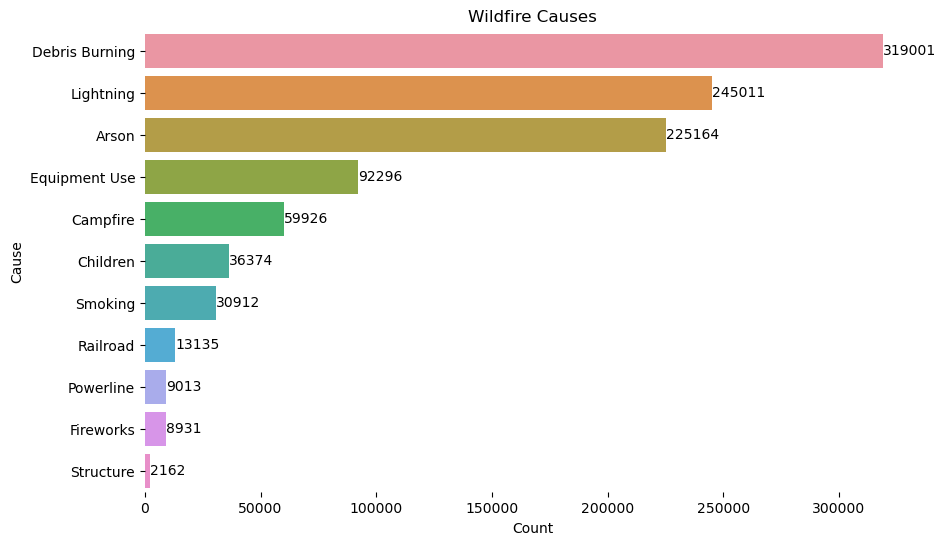

In [87]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order=fires_data['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

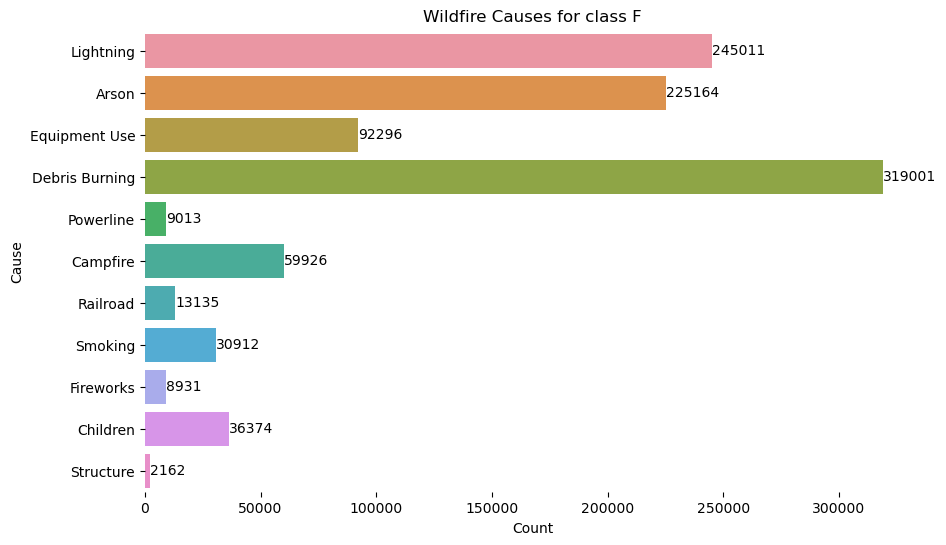

In [88]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order=fires_data[fires_data['FIRE_SIZE_CLASS']=='F']['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes for class F')
plt.xlabel('Count')
plt.ylabel('Cause')

for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

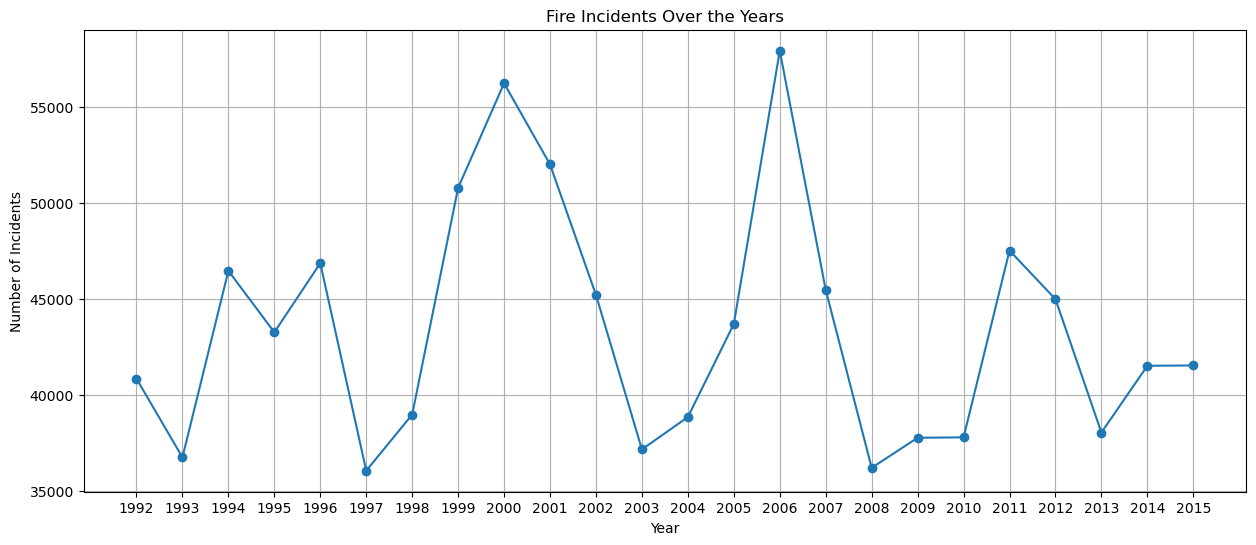

In [89]:
year_counts = fires_data['FIRE_YEAR'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
year_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Fire Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(year_counts.index)  
plt.show()

In [90]:
highest_year = fires_data['FIRE_YEAR'].max()
lowest_year = fires_data['FIRE_YEAR'].min()
highest_year_count = fires_data['FIRE_YEAR'].value_counts().loc[highest_year]
lowest_year_count = fires_data['FIRE_YEAR'].value_counts().loc[lowest_year]

print("Highest year:", highest_year)
print("Highest year value count:", highest_year_count)
print("Lowest year:", lowest_year)
print("Lowest year value count:", lowest_year_count)


Highest year: 2015
Highest year value count: 41534
Lowest year: 1992
Lowest year value count: 40845


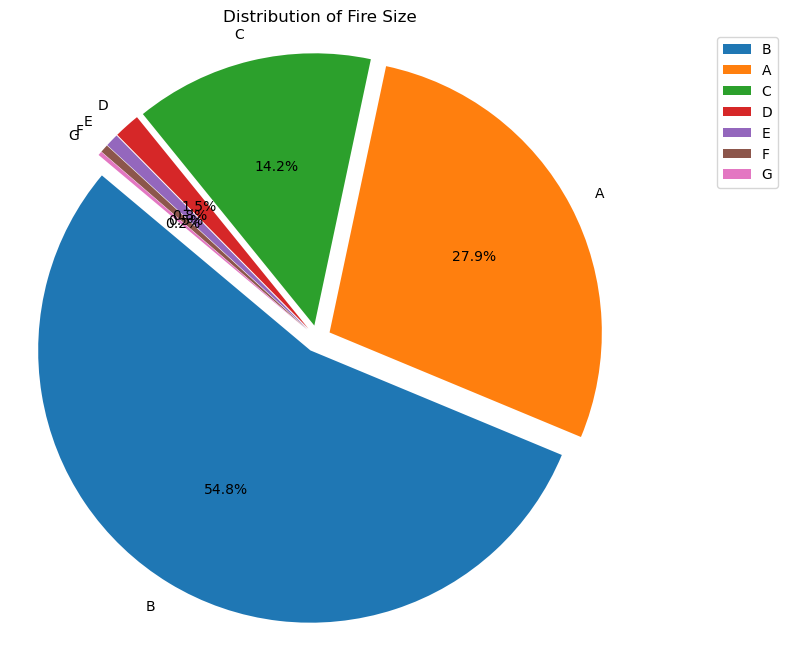

In [91]:
size_counts = fires_data['FIRE_SIZE_CLASS'].value_counts()
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.figure(figsize=(8, 8))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140,explode=explode)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10)
plt.title('Distribution of Fire Size')
plt.axis('equal')  
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


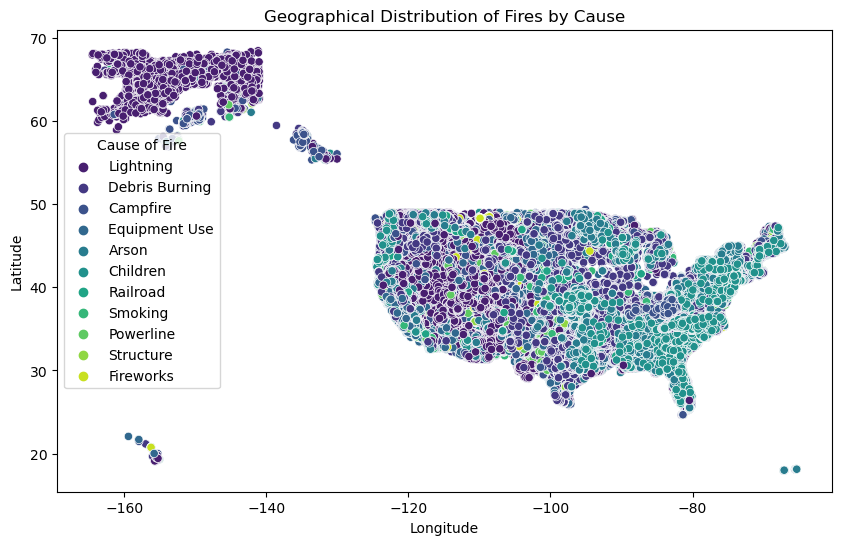

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=fires_data, hue='STAT_CAUSE_DESCR', palette='viridis')
plt.title('Geographical Distribution of Fires by Cause')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cause of Fire')
plt.show()

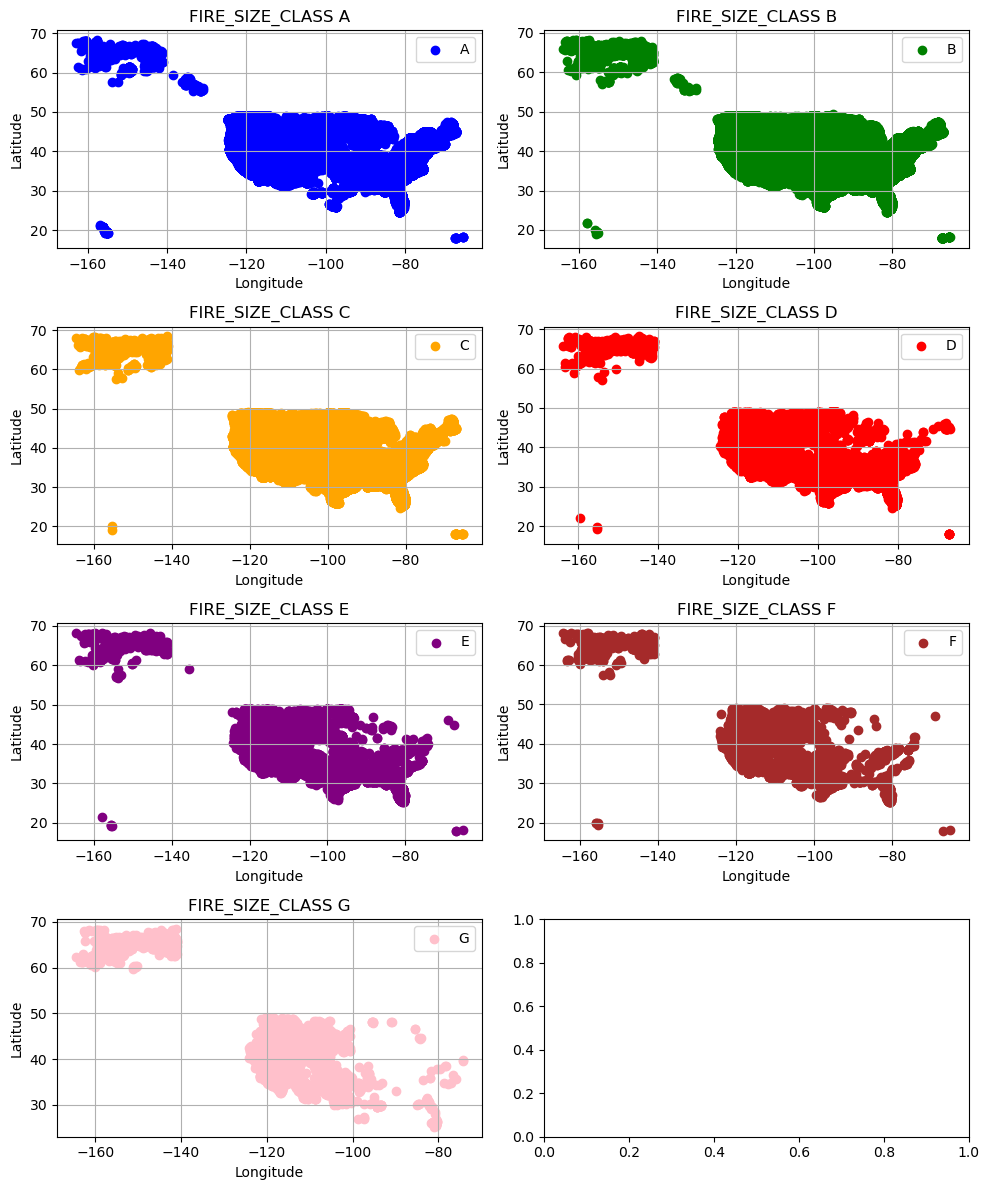

In [94]:
fig, axes = plt.subplots(4, 2, figsize=(10,12))  
colors = {'A': 'blue', 'B': 'green', 'C': 'orange', 'D': 'red', 'E': 'purple', 'F': 'brown', 'G': 'pink'}


for idx, (size_class, group) in enumerate(fires_data.groupby('FIRE_SIZE_CLASS')):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]
    ax.scatter(group['LONGITUDE'], group['LATITUDE'], color=colors[size_class], label=size_class)
    ax.set_title(f'FIRE_SIZE_CLASS {size_class}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

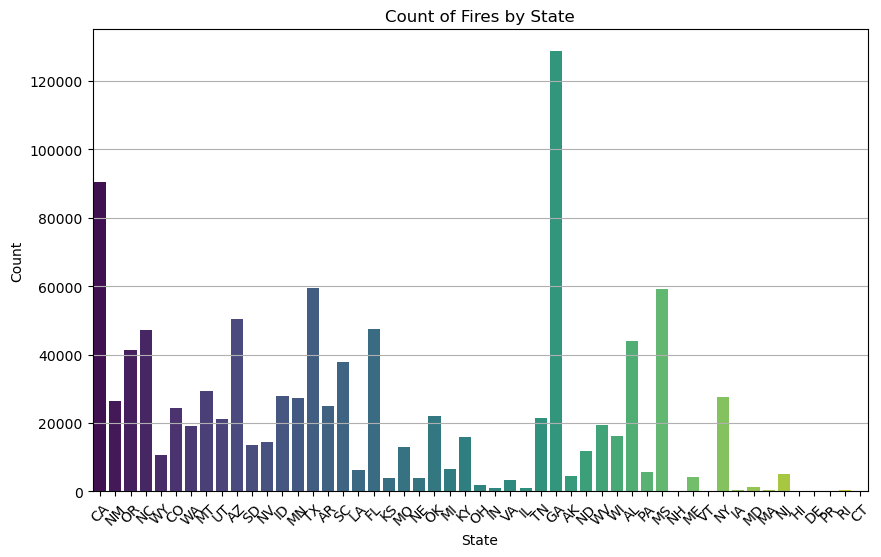

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fires_data, x='STATE', palette='viridis')
plt.title('Count of Fires by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()

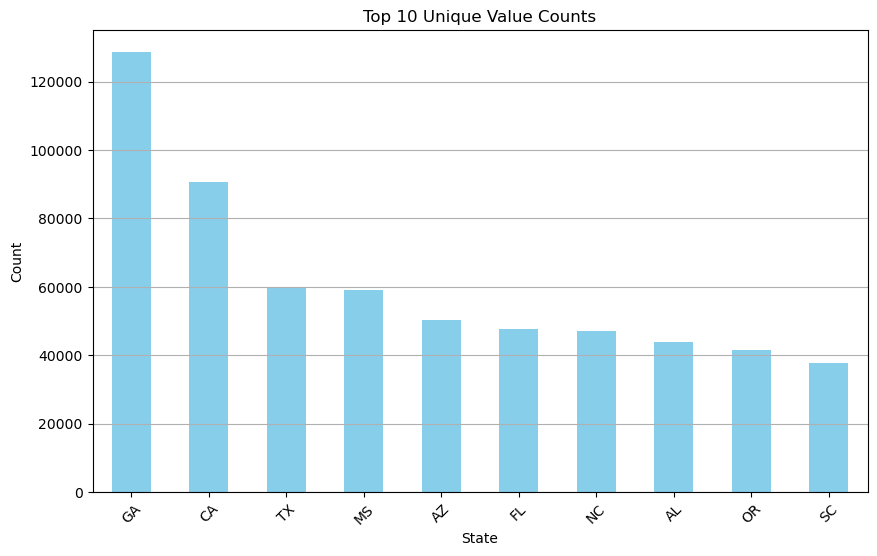

In [96]:
value_counts = fires_data['STATE'].value_counts()

top_10_values = value_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_values.plot(kind='bar', color='skyblue')
plt.title('Top 10 Unique Value Counts')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.show()

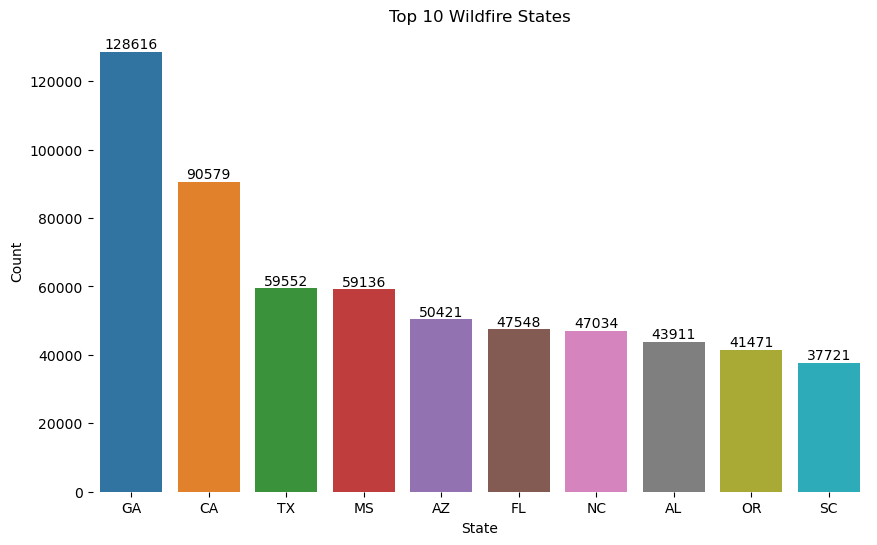

In [97]:
state_counts = fires_data['STATE'].value_counts()

top_10_states = state_counts.head(10).index

top_10_data = fires_data[fires_data['STATE'].isin(top_10_states)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='STATE', data=top_10_data, order=top_10_states)
plt.title('Top 10 Wildfire States')
plt.xlabel('State')
plt.ylabel('Count')

for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', ha='center', va='bottom')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

In [98]:
fire_counts = fires_data.groupby(['STATE', 'FIRE_YEAR']).size().reset_index(name='FIRE_COUNT')

top_two_states = fire_counts.groupby('STATE')['FIRE_COUNT'].sum().nlargest(3).index

top_two_data = fire_counts[fire_counts['STATE'].isin(top_two_states)]

plt.figure(figsize=(15, 6))
for state, state_data in top_two_data.groupby('STATE'):
    plt.plot(state_data['FIRE_YEAR'], state_data['FIRE_COUNT'], label=state)

plt.title('Trend of Fire Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.legend()

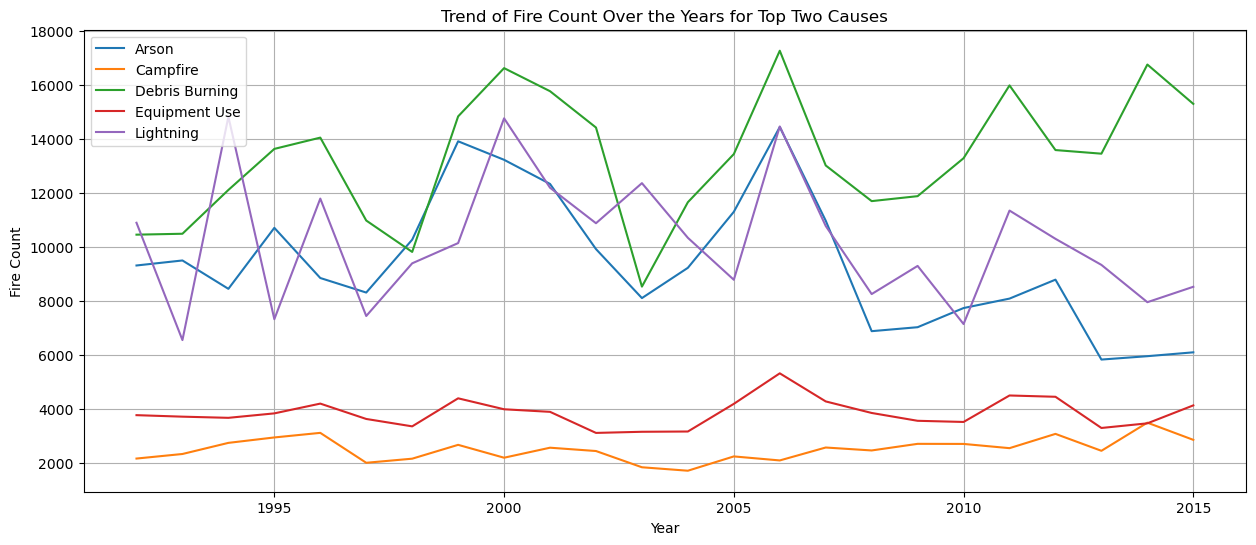

In [99]:
fire_counts = fires_data.groupby(['STAT_CAUSE_DESCR', 'FIRE_YEAR']).size().reset_index(name='FIRE_COUNT')
top_two_causes = fire_counts.groupby('STAT_CAUSE_DESCR')['FIRE_COUNT'].sum().nlargest(5).index

top_two_data = fire_counts[fire_counts['STAT_CAUSE_DESCR'].isin(top_two_causes)]

plt.figure(figsize=(15, 6))
for cause, cause_data in top_two_data.groupby('STAT_CAUSE_DESCR'):
    plt.plot(cause_data['FIRE_YEAR'], cause_data['FIRE_COUNT'], label=cause)

plt.title('Trend of Fire Count Over the Years for Top Two Causes')
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
top_5 = fires_data.nlargest(5, 'FIRE_SIZE')


print("Top 5 incidents with highest acres burnt (selected columns):")
top_5[['STAT_CAUSE_DESCR', 'STATE', 'FIRE_SIZE']] # Selecting specific columns

Top 5 incidents with highest acres burnt (selected columns):


STAT_CAUSE_DESCR STATE  FIRE_SIZE
258016         Lightning    AK    49786.0
923413         Lightning    CO    49628.0
104549         Lightning    CA    49551.0
329015         Lightning    FL    49500.0
1003522        Lightning    AK    49446.0

In [101]:
least = fires_data.nsmallest(1, 'FIRE_SIZE')

print("\nIncident with the least acres burnt (selected columns):")
least[['STAT_CAUSE_DESCR', 'STATE', 'FIRE_SIZE']]


Incident with the least acres burnt (selected columns):


STAT_CAUSE_DESCR STATE  FIRE_SIZE
706718        Lightning    PA     0.0001

In [102]:
county_wildfires = fires_data['FIPS_NAME'].value_counts()
highest_county = county_wildfires.idxmax()

highest_county_data = fires_data[fires_data['FIPS_NAME'] == highest_county]

print(f"County with the highest number of wildfires: {highest_county}")

County with the highest number of wildfires: Coconino


In [103]:
county_state_counts = fires_data.groupby(['STATE', 'FIPS_NAME']).size().reset_index(name='WILDFIRE_COUNT')
max_wildfire_count_row = county_state_counts.loc[county_state_counts['WILDFIRE_COUNT'].idxmax()]

print("County and state with the highest number of wildfires:")
print(max_wildfire_count_row)

County and state with the highest number of wildfires:
STATE                   AZ
FIPS_NAME         Coconino
WILDFIRE_COUNT       13825
Name: 163, dtype: object


In [104]:
max_wildfire_county_data = fires_data[(fires_data['FIPS_NAME'] == max_wildfire_count_row['FIPS_NAME'])]
wildfire_count_trend = max_wildfire_county_data.groupby('FIRE_YEAR').size()
plt.figure(figsize=(10, 6))
wildfire_count_trend.plot(marker='o')
plt.title('Trend of Wildfires Count Over the Years for the County with the Highest Count')
plt.xlabel('Year')
plt.ylabel('Wildfires Count')
plt.grid(True)
plt.show()

In [105]:
fire_size_class_trend = fires_data.groupby('FIRE_YEAR')['FIRE_SIZE_CLASS'].value_counts().unstack().fillna(0)
plt.figure(figsize=(15, 10))
fire_size_class_trend.plot(marker='o')
plt.title('Trend of Fire Size Class Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Fire Size Class')
plt.grid(True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

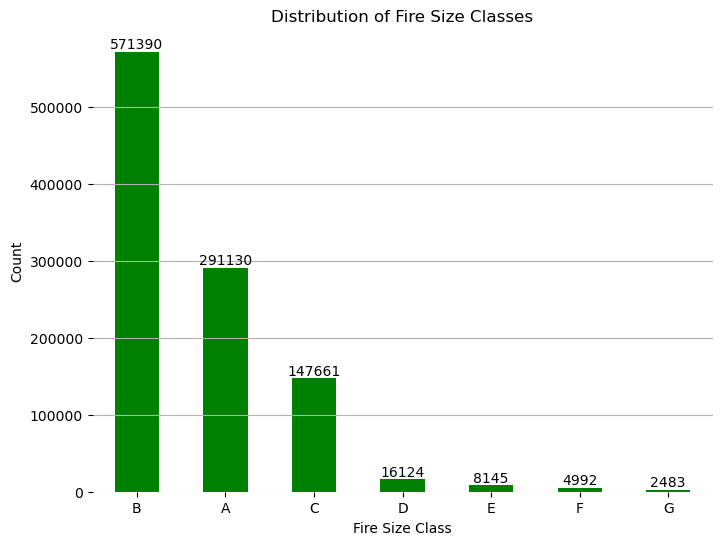

In [106]:
fire_size_counts = fires_data['FIRE_SIZE_CLASS'].value_counts()
plt.figure(figsize=(8, 6))
barplot = fire_size_counts.plot(kind='bar',color='green')

for idx, count in enumerate(fire_size_counts):
    barplot.text(idx, count + 0.1, str(count), ha='center', va='bottom')

plt.box(False)
plt.title('Distribution of Fire Size Classes')
plt.xlabel('Fire Size Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [107]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'


In [108]:
fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'])
fires_data['MONTH'] = fires_data['DISCOVERY_DATE'].dt.month
fires_data['SEASON'] = fires_data['MONTH'].apply(get_season)
season_counts = fires_data['SEASON'].value_counts()

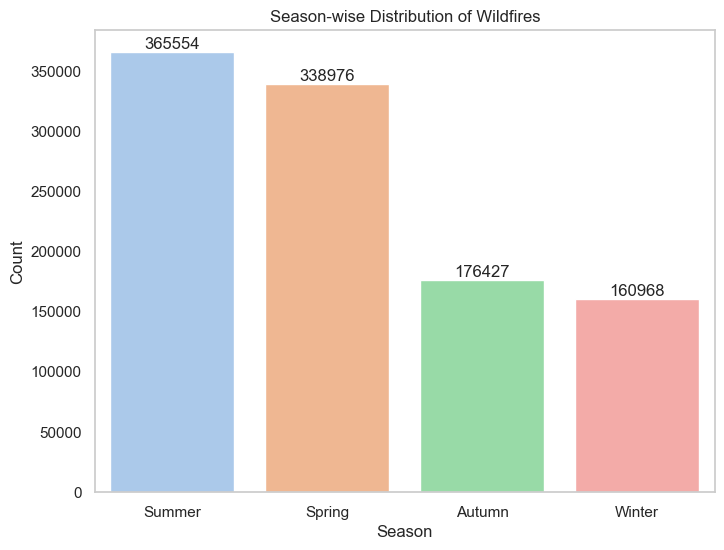

In [109]:
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors)
for idx, count in enumerate(season_counts):
    barplot.text(idx, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Season-wise Distribution of Wildfires')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(axis='y') 
plt.show()

In [110]:
fires_data['DISCOVERY_DOW'] = fires_data['DISCOVERY_DATE'].dt.dayofweek + 1
fires_data['DAY_TYPE'] = fires_data['DISCOVERY_DOW'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')
day_type_counts = fires_data['DAY_TYPE'].value_counts()
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette=colors)
for idx, count in enumerate(day_type_counts):
    barplot.text(idx, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Comparison of Weekdays and Weekends for Wildfires')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [111]:
fips_counts = fires_data['FIPS_NAME'].value_counts()

highest_count_fips = fips_counts.idxmax()
highest_count_value = fips_counts.max()

lowest_count_fips = fips_counts.idxmin()
lowest_count_value = fips_counts.min()

highest_count_state = fires_data[fires_data['FIPS_NAME'] == highest_count_fips]['STATE'].iloc[0]

lowest_count_state = fires_data[fires_data['FIPS_NAME'] == lowest_count_fips]['STATE'].iloc[0]

print(f'Highest count FIPS_NAME: {highest_count_fips}, Count: {highest_count_value}, State: {highest_count_state}')
print(f'Lowest count FIPS_NAME: {lowest_count_fips}, Count: {lowest_count_value}, State: {lowest_count_state}')


Highest count FIPS_NAME: Coconino, Count: 13827, State: AZ
Lowest count FIPS_NAME: Ness, Count: 1, State: KS


In [112]:
fips_name_counts = fires_data['FIPS_NAME'].value_counts().head(5)
fips_name_counts

Coconino    13827
Lincoln     11901
Jackson      8488
Marion       8070
Gila         7935
Name: FIPS_NAME, dtype: int64

In [117]:
fires_data['FIPS_STATE'] = fires_data['FIPS_NAME']+'-'+fires_data['STATE']

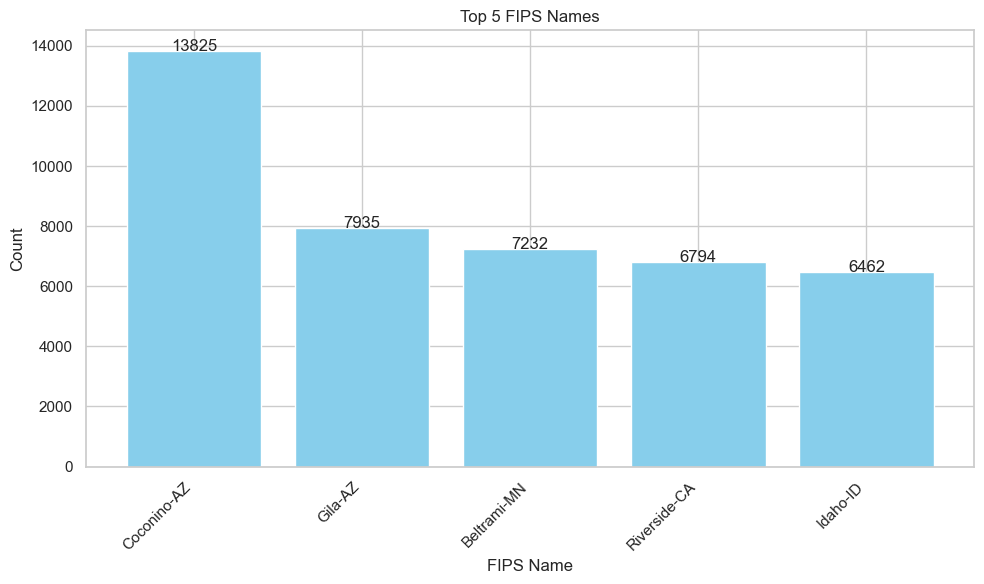

In [118]:
fips_name_counts = fires_data['FIPS_STATE'].value_counts().head(5)
plt.figure(figsize=(10, 6))
plt.bar(fips_name_counts.index, fips_name_counts.values, color='skyblue')
plt.title('Top 5 FIPS Names')
plt.xlabel('FIPS Name')
plt.ylabel('Count')
for i, v in enumerate(fips_name_counts.values):
    plt.text(i, v + 1, str(v), ha='center')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

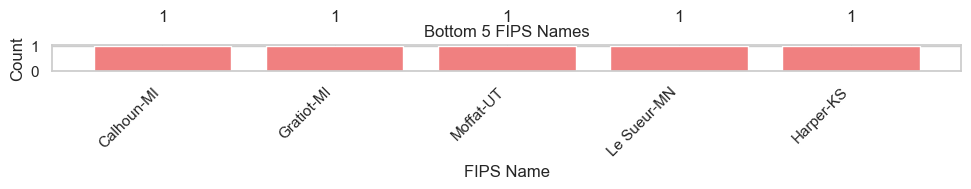

In [119]:
fips_name_counts = fires_data['FIPS_STATE'].value_counts().tail(5)
plt.figure(figsize=(10, 6))
plt.bar(fips_name_counts.index, fips_name_counts.values, color='lightcoral')
plt.title('Bottom 5 FIPS Names')
plt.xlabel('FIPS Name')
plt.ylabel('Count')

for i, v in enumerate(fips_name_counts.values):
    plt.text(i, v + 1, str(v), ha='center')

plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [120]:
fires_data.drop('FIPS_STATE',axis=1, inplace=True)

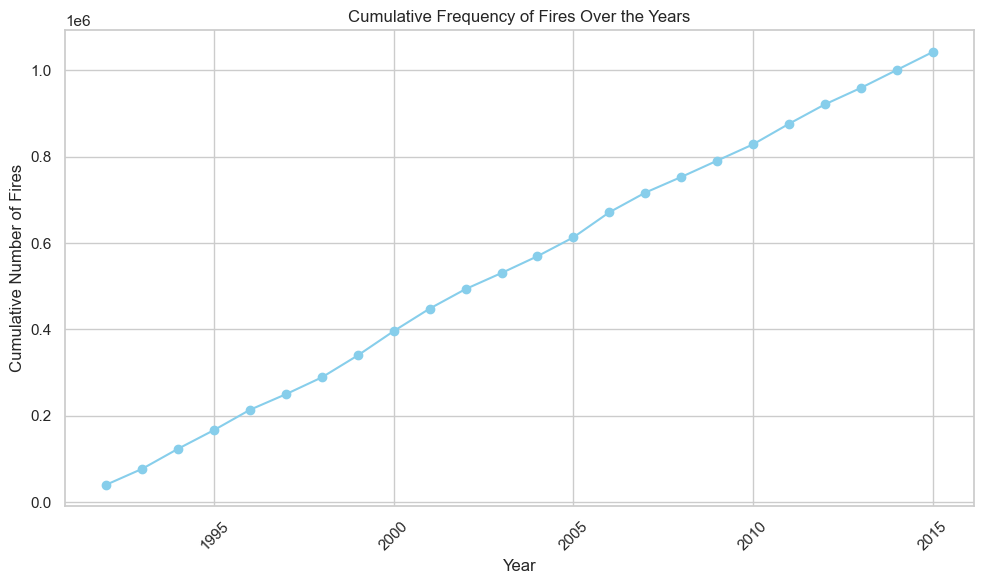

In [121]:
fires_per_year = fires_data['FIRE_YEAR'].value_counts().sort_index()
cumulative_fires = fires_per_year.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_fires.index, cumulative_fires.values, marker='o', color='skyblue', linestyle='-')
plt.title('Cumulative Frequency of Fires Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Fires')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

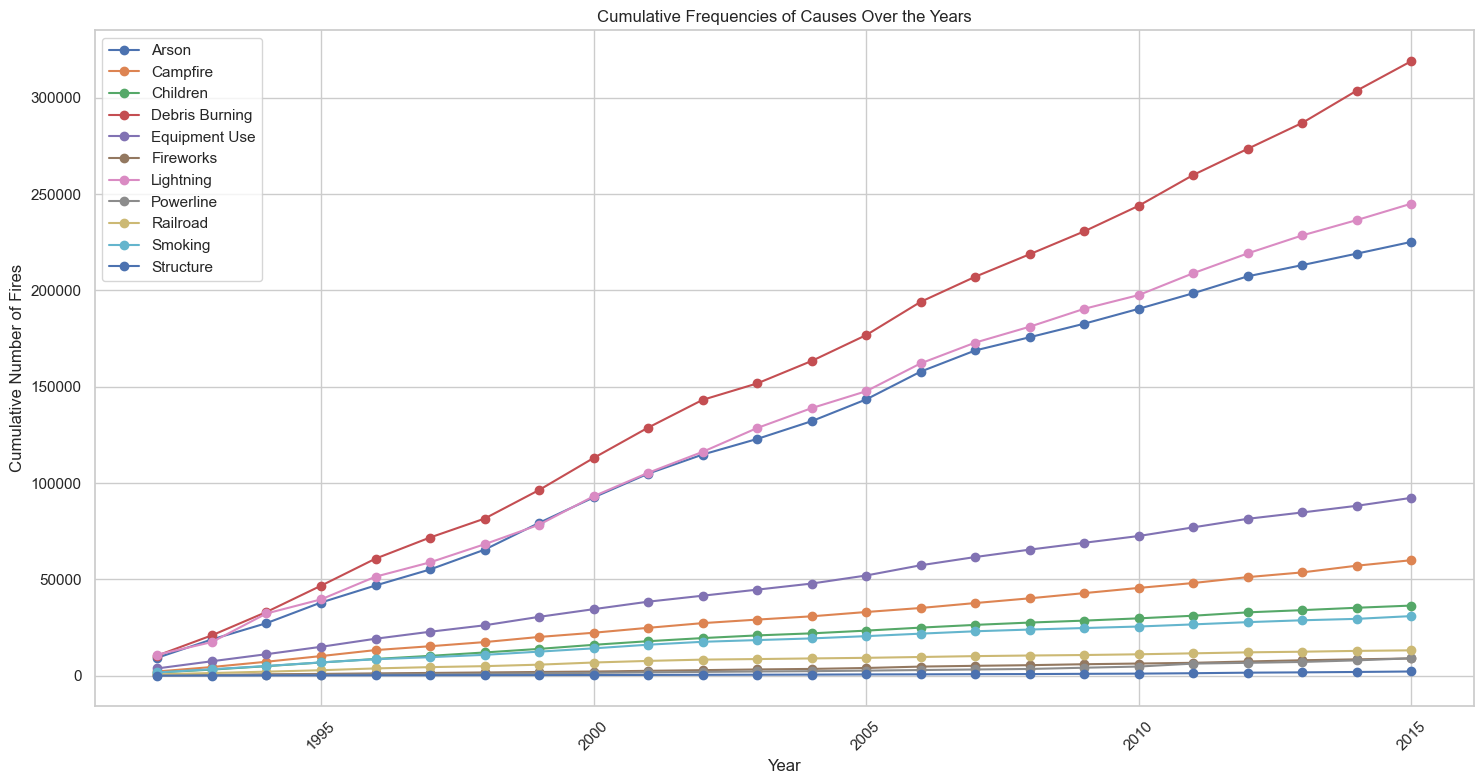

In [122]:
fire_causes = fires_data.groupby(['FIRE_YEAR', 'STAT_CAUSE_DESCR']).size().unstack(fill_value=0)
cumulative_causes = fire_causes.cumsum()
plt.figure(figsize=(15, 8))
for cause in cumulative_causes.columns:
    plt.plot(cumulative_causes.index, cumulative_causes[cause], marker='o', label=cause)

plt.title('Cumulative Frequencies of Causes Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Fires')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

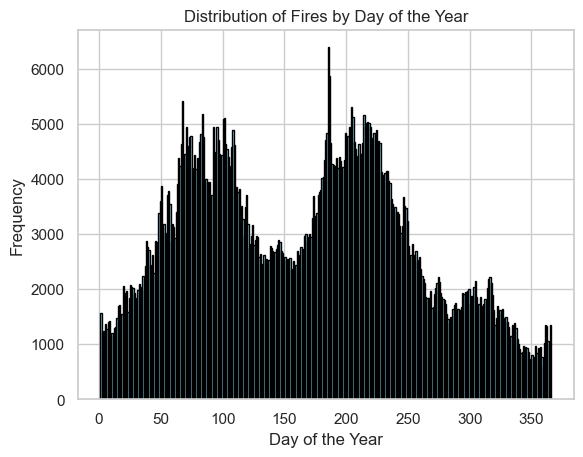

In [123]:
plt.hist(fires_data['DISCOVERY_DOY'], bins=range(1, 367), color='skyblue', edgecolor='black')
plt.xlabel('Day of the Year')
plt.ylabel('Frequency')
plt.title('Distribution of Fires by Day of the Year')
plt.show()

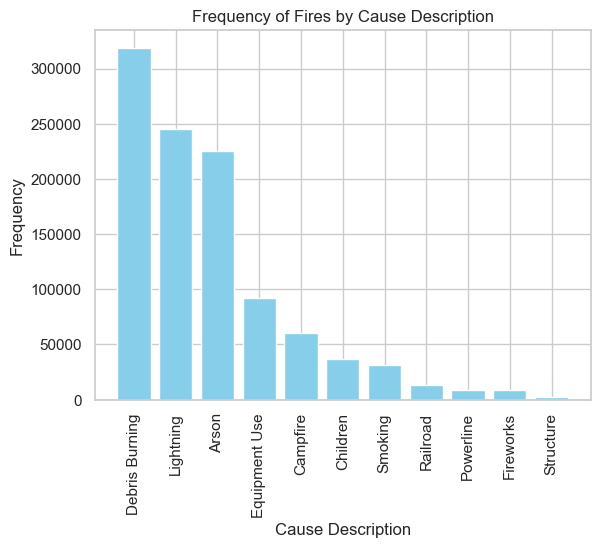

In [124]:
plt.bar(fires_data['STAT_CAUSE_DESCR'].value_counts().index, fires_data['STAT_CAUSE_DESCR'].value_counts().values, color='skyblue')
plt.xlabel('Cause Description')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by Cause Description')
plt.xticks(rotation=90)
plt.show()

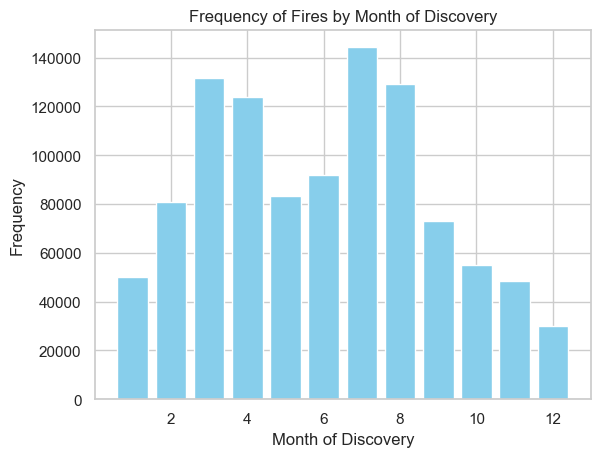

In [125]:

plt.bar(fires_data['DISCOVERY_MONTH'].value_counts().index, fires_data['DISCOVERY_MONTH'].value_counts().values, color='skyblue')
plt.xlabel('Month of Discovery')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by Month of Discovery')
plt.show()

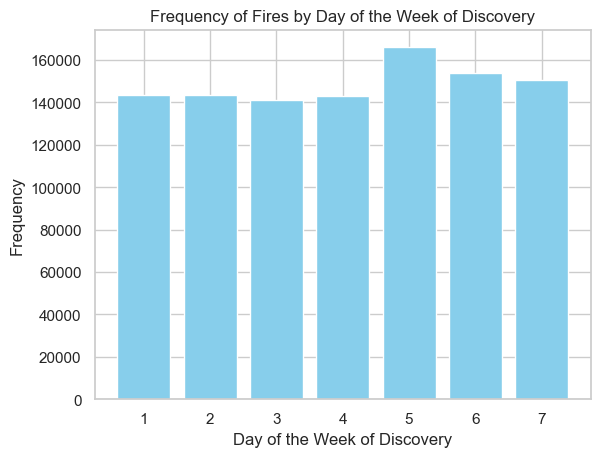

In [126]:
plt.bar(fires_data['DISCOVERY_DOW'].value_counts().index, fires_data['DISCOVERY_DOW'].value_counts().values, color='skyblue')
plt.xlabel('Day of the Week of Discovery')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by Day of the Week of Discovery')
plt.show()


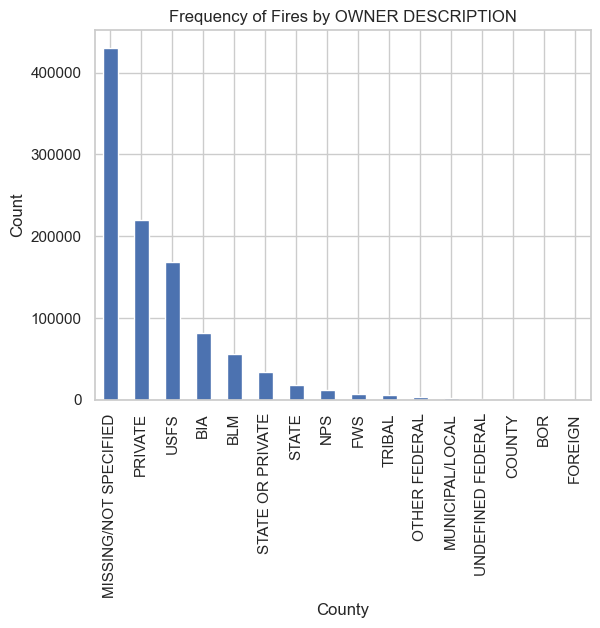

In [127]:
state_counts = new_fires_data['OWNER_DESCR'].value_counts()
state_counts.plot(kind='bar')
plt.title('Frequency of Fires by OWNER DESCRIPTION')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()


### <center>Bivariate Analysis</center>

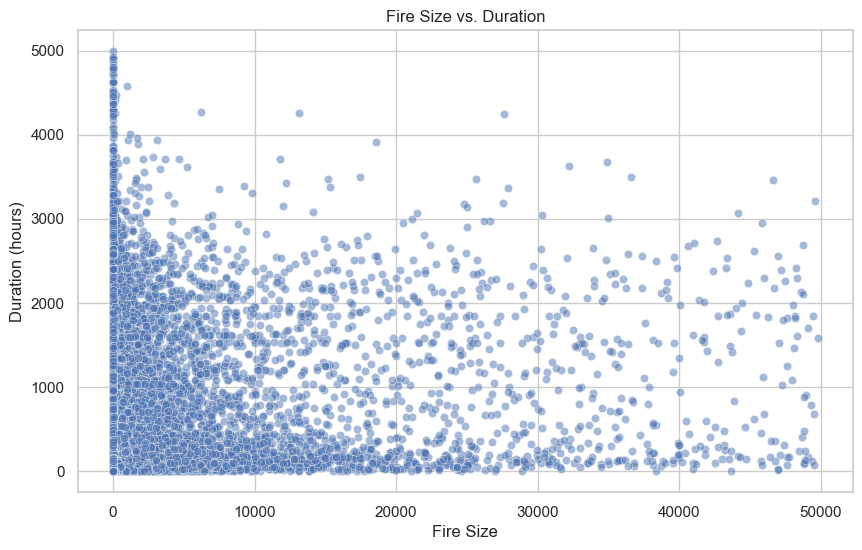

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_fires_data, x='FIRE_SIZE', y='DURATION_TIME_HRS', alpha=0.5)
plt.xlabel('Fire Size')
plt.ylabel('Duration (hours)')
plt.title('Fire Size vs. Duration')
plt.show()


In [129]:
plt.figure(figsize=(15, 8))
sns.countplot(data=new_fires_data, x='STAT_CAUSE_DESCR', hue='FIRE_SIZE_CLASS')
plt.xlabel('Cause of Fire')
plt.ylabel('Count')
plt.title('Fire Size Class by Cause of Fire')
plt.legend(title='Fire Size Class')
plt.show()

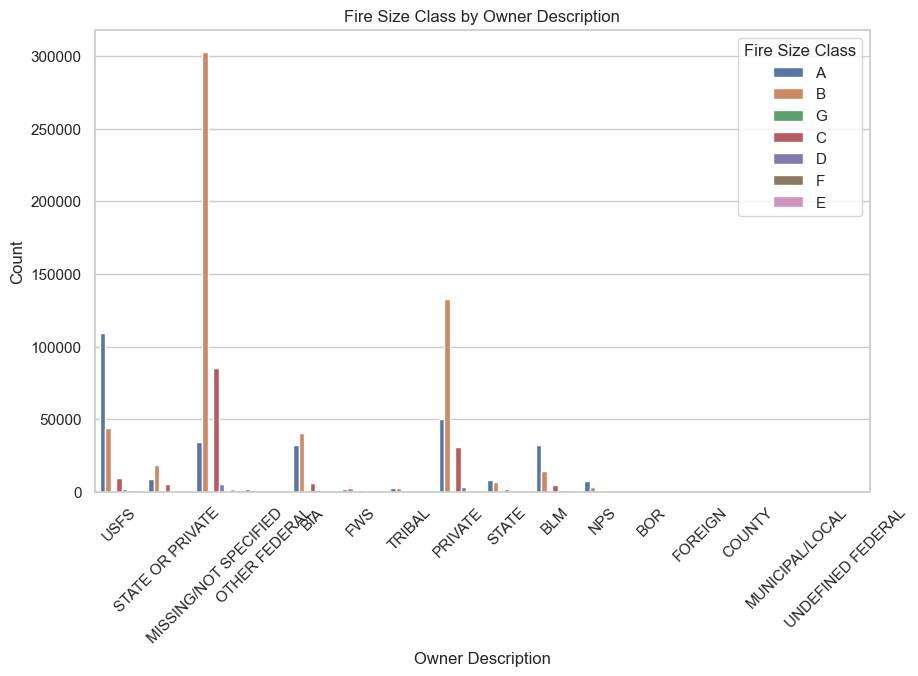

In [130]:

plt.figure(figsize=(10, 6))
sns.countplot(data=new_fires_data, x='OWNER_DESCR', hue='FIRE_SIZE_CLASS')
plt.xlabel('Owner Description')
plt.ylabel('Count')
plt.title('Fire Size Class by Owner Description')
plt.legend(title='Fire Size Class')
plt.xticks(rotation=45)
plt.show()


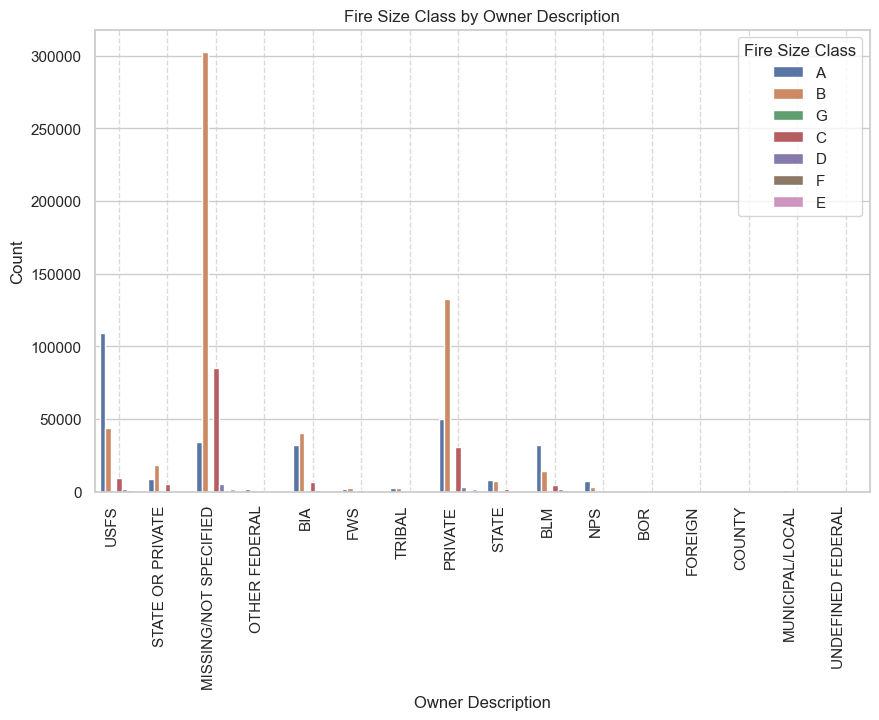

In [131]:

plt.figure(figsize=(10, 6))
sns.countplot(data=new_fires_data, x='OWNER_DESCR', hue='FIRE_SIZE_CLASS')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlabel('Owner Description')
plt.ylabel('Count')
plt.title('Fire Size Class by Owner Description')
plt.legend(title='Fire Size Class')
plt.xticks(rotation=90, ha='right')  
plt.show()


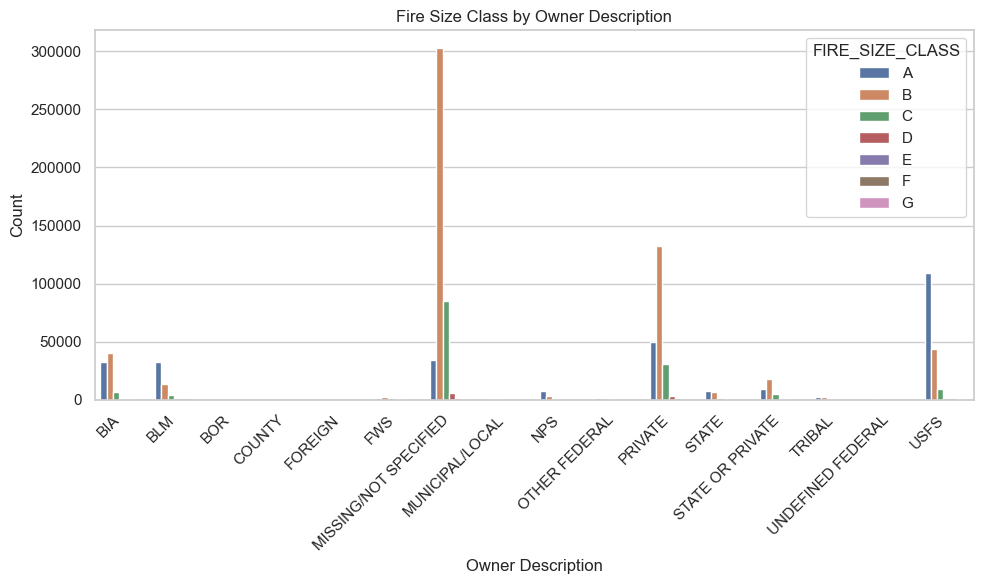

In [132]:
plt.figure(figsize=(10, 6))
owner_counts = new_fires_data.groupby(['OWNER_DESCR', 'FIRE_SIZE_CLASS']).size().reset_index(name='Count')
sns.barplot(data=owner_counts, x='OWNER_DESCR', y='Count', hue='FIRE_SIZE_CLASS')
plt.xlabel('Owner Description')
plt.ylabel('Count')
plt.title('Fire Size Class by Owner Description')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Add extra spacing between bars
plt.show()

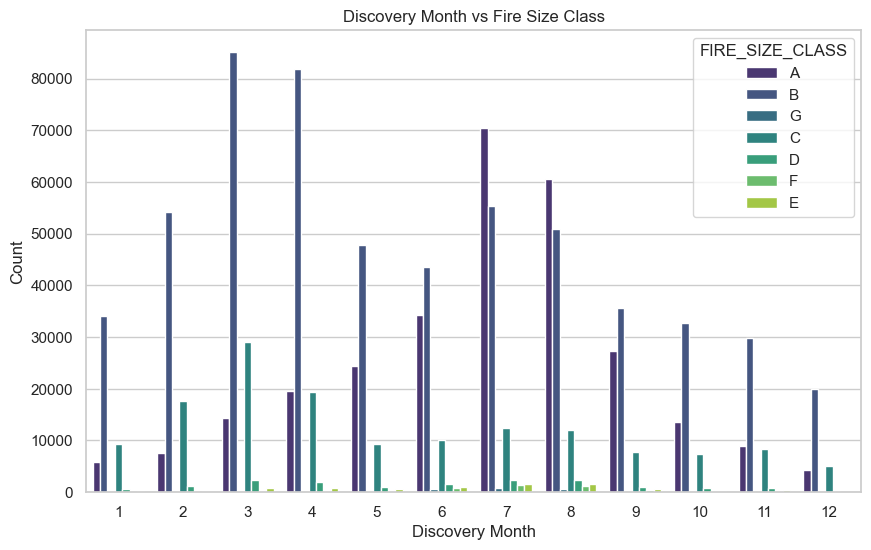

In [133]:
new_fires_data['DISCOVERY_MONTH'] = pd.Categorical(new_fires_data['DISCOVERY_MONTH'])
plt.figure(figsize=(10, 6))
sns.countplot(x='DISCOVERY_MONTH', hue='FIRE_SIZE_CLASS', data=new_fires_data, palette='viridis')
plt.title('Discovery Month vs Fire Size Class')
plt.xlabel('Discovery Month')
plt.ylabel('Count')
plt.show()

In [134]:
import pandas as pd
new_fires_data = pd.read_csv("new_fires_data.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_8380\519960259.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  new_fires_data = pd.read_csv("new_fires_data.csv")


In [135]:
new_fires_data.shape

(1041925, 18)

## <center>Model</center>

In [136]:
from datetime import datetime
def get_am_pm(time_str):
    try:
        time_obj = datetime.strptime(time_str, '%H:%M:%S')
    except:
        return pd.NA
    return time_obj.strftime('%p')

In [137]:
new_fires_data['DISCOVERY_AM_PM'] = new_fires_data['DISCOVERY_TIME'].apply(lambda x: get_am_pm(str(x)))

In [138]:
new_fires_data = new_fires_data[((new_fires_data['FIRE_SIZE']<=0.2)&(new_fires_data['DURATION_TIME_HRS']<=24))|(new_fires_data['FIRE_SIZE']>0.2)]

In [139]:
new_fires_data = new_fires_data[new_fires_data['FIRE_SIZE']>0.1]

In [140]:
new_fires_data.head().T

0                 6                 7   \
FIRE_YEAR                2004              2005              2005   
DISCOVERY_DATE     2004-05-11        2005-03-07        2005-03-14   
DISCOVERY_DOY             133                67                74   
DISCOVERY_TIME       08:45:00          13:00:00          12:00:00   
STAT_CAUSE_CODE           1.0               5.0               5.0   
STAT_CAUSE_DESCR    Lightning    Debris Burning    Debris Burning   
FIRE_SIZE                0.25               0.8               1.0   
FIRE_SIZE_CLASS             A                 B                 B   
LATITUDE            38.933056         40.968056         41.233611   
LONGITUDE         -120.404444       -122.433889       -122.283333   
OWNER_CODE                5.0              13.0              13.0   
OWNER_DESCR              USFS  STATE OR PRIVATE  STATE OR PRIVATE   
STATE                      CA                CA                CA   
FIPS_CODE                  61                89                93   
FIPS_NAME              Placer            Shasta          Siskiyou   
DISCOVERY_MONTH             5                 3                 3   
DISCOVERY_DOW               1                 0                 0   
DURATION_TIME_HRS        6.75               3.0               5.0   
DISCOVERY_AM_PM            AM                PM                PM   

                                      11          12  
FIRE_YEAR                           2004        2004  
DISCOVERY_DATE                2004-09-27  2004-10-02  
DISCOVERY_DOY                        272         277  
DISCOVERY_TIME                  12:00:00    06:30:00  
STAT_CAUSE_CODE                      4.0         1.0  
STAT_CAUSE_DESCR                Campfire   Lightning  
FIRE_SIZE                            6.0         0.2  
FIRE_SIZE_CLASS                        B           A  
LATITUDE                       38.433333   38.675833  
LONGITUDE                        -120.51 -120.279722  
OWNER_CODE                          14.0         5.0  
OWNER_DESCR        MISSING/NOT SPECIFIED        USFS  
STATE                                 CA          CA  
FIPS_CODE                              5          17  
FIPS_NAME                         Amador   El Dorado  
DISCOVERY_MONTH                        9          10  
DISCOVERY_DOW                          0           5  
DURATION_TIME_HRS                    6.0         8.5  
DISCOVERY_AM_PM                       PM          AM

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [145]:
model_data = new_fires_data.drop(['DISCOVERY_DATE','DISCOVERY_TIME','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','OWNER_CODE','FIPS_NAME'],axis=1)

In [146]:
model_data.columns

Index(['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW', 'DURATION_TIME_HRS',
       'DISCOVERY_AM_PM'],
      dtype='object')

In [147]:
model_data.drop('DURATION_TIME_HRS', axis=1, inplace=True)

In [148]:
model_data.drop('DISCOVERY_AM_PM',axis=1, inplace=True)

In [149]:
X = model_data.drop('FIRE_SIZE', axis=1)
y = model_data['FIRE_SIZE']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [151]:
model_data.dtypes

FIRE_YEAR             int64
STAT_CAUSE_DESCR     object
FIRE_SIZE           float64
OWNER_DESCR          object
STATE                object
FIPS_CODE             int64
DISCOVERY_MONTH       int64
DISCOVERY_DOW         int64
dtype: object

In [152]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [153]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [154]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [155]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### <center>FIRE SIZE PREDICTION</center>

In [156]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [157]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [158]:
X_train

FIRE_YEAR STAT_CAUSE_DESCR            OWNER_DESCR STATE  FIPS_CODE  \
738686       2004        Lightning  MISSING/NOT SPECIFIED    NY        105   
220085       2004            Arson                    BIA    ND          5   
80839        1996        Lightning                   USFS    OR         19   
606538       1996    Equipment Use  MISSING/NOT SPECIFIED    CA         45   
423365       2008        Lightning  MISSING/NOT SPECIFIED    TX        337   
...           ...              ...                    ...   ...        ...   
406813       1998            Arson  MISSING/NOT SPECIFIED    TX        199   
516627       1999            Arson  MISSING/NOT SPECIFIED    GA        159   
251726       2001        Lightning                    BIA    AZ         17   
867390       2009        Powerline       STATE OR PRIVATE    TX          1   
234079       2004   Debris Burning                    BIA    AZ          1   

        DISCOVERY_MONTH  DISCOVERY_DOW  
738686                4              6  
220085                5              6  
80839                 8              6  
606538                8              0  
423365                8              5  
...                 ...            ...  
406813                7              3  
516627                9              6  
251726                6              3  
867390               10              2  
234079                6              0  

[598687 rows x 7 columns]

In [159]:
from sklearn.metrics import mean_squared_error
import numpy as np
linear_model_rmse = mean_squared_error(model.predict(X_test),y_test)**(1/2)
print("RMSE Linear Model:", linear_model_rmse)

RMSE Linear Model: 973.9808782815807


In [160]:
y_test

293920     20.60
639705     18.00
569204      2.00
307776      5.00
854761     10.00
           ...  
268227      0.30
739915      2.24
719246      1.13
1002219     4.20
328662     25.00
Name: FIRE_SIZE, Length: 199563, dtype: float64

In [161]:
model.predict(X_test)

array([257.6465966 ,  17.9488217 , -31.3102483 , ..., -15.2566355 ,
       308.53751306, 132.48856266])

### <center>Implementing GridSearch</center>

In [162]:
from sklearn.model_selection import cross_val_score, GridSearchCV


scores = cross_val_score(model, X_test, y_test, cv=2)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.05092758 0.02161284]


In [163]:
parameters = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(model, parameters, cv=2)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]})

In [164]:
best_model = grid_search.best_estimator_

test_score = best_model.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Test set score of the best model: 0.04612924577336963


In [165]:
best_model.predict(X_test)

array([257.65386786,  17.94480657, -31.29943442, ..., -15.26716991,
       308.53788871, 132.50282957])

In [166]:
y_test

293920     20.60
639705     18.00
569204      2.00
307776      5.00
854761     10.00
           ...  
268227      0.30
739915      2.24
719246      1.13
1002219     4.20
328662     25.00
Name: FIRE_SIZE, Length: 199563, dtype: float64

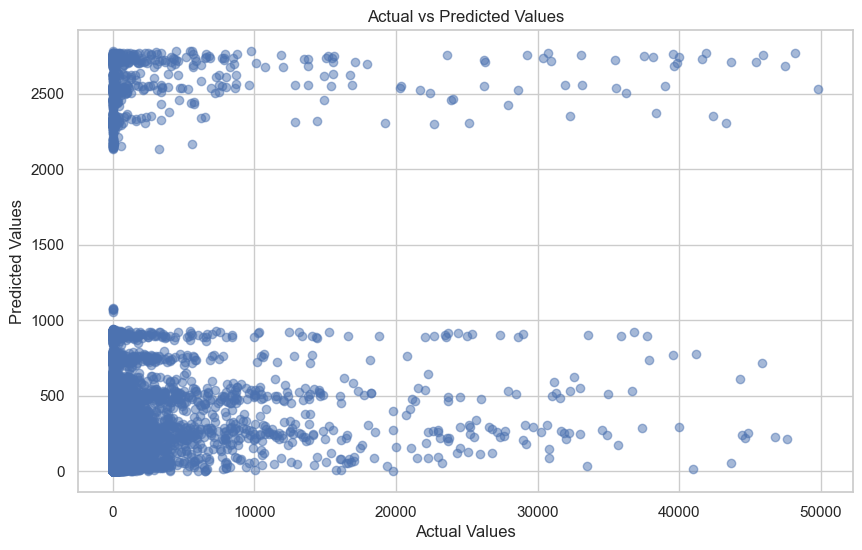

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, abs(best_model.predict(X_test)), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ylim(0,500)
plt.show()


In [169]:
best_model = grid_search.best_estimator_

In [170]:
y_test

293920     20.60
639705     18.00
569204      2.00
307776      5.00
854761     10.00
           ...  
268227      0.30
739915      2.24
719246      1.13
1002219     4.20
328662     25.00
Name: FIRE_SIZE, Length: 199563, dtype: float64

In [171]:
best_model.predict(X_test)

array([257.65386786,  17.94480657, -31.29943442, ..., -15.26716991,
       308.53788871, 132.50282957])

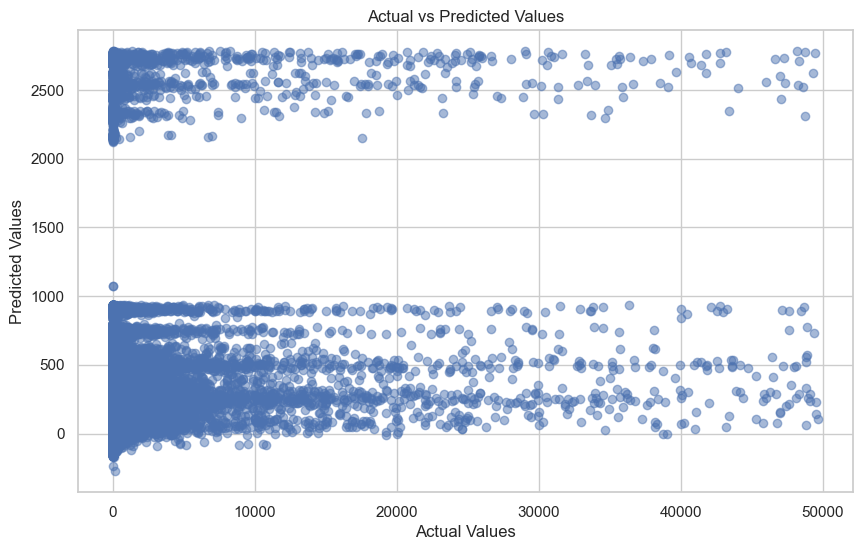

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [173]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'regressor__max_depth': [None, 3, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))
])

In [174]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))])

In [175]:
best_model = tree_pipeline

y_test

best_model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()


In [176]:
print("Decision Tree RMSE: ",mean_squared_error(best_model.predict(X_test),y_test)**(1/2))

Decision Tree RMSE:  983.332667997095


In [177]:
# Define a pipeline for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(max_depth=20,n_estimators=10))
])
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=10))])

In [178]:
print("Random Forest RMSE: ",mean_squared_error(forest_pipeline.predict(X_test),y_test)**(1/2))

Random Forest RMSE:  1079.827679981194


In [179]:
best_model = forest_pipeline

y_test


293920     20.60
639705     18.00
569204      2.00
307776      5.00
854761     10.00
           ...  
268227      0.30
739915      2.24
719246      1.13
1002219     4.20
328662     25.00
Name: FIRE_SIZE, Length: 199563, dtype: float64

In [180]:

best_model.predict(X_test)


array([ 305.51321308,   14.30172599,   11.06833547, ...,   12.01902072,
       1404.53284021,  153.43769195])

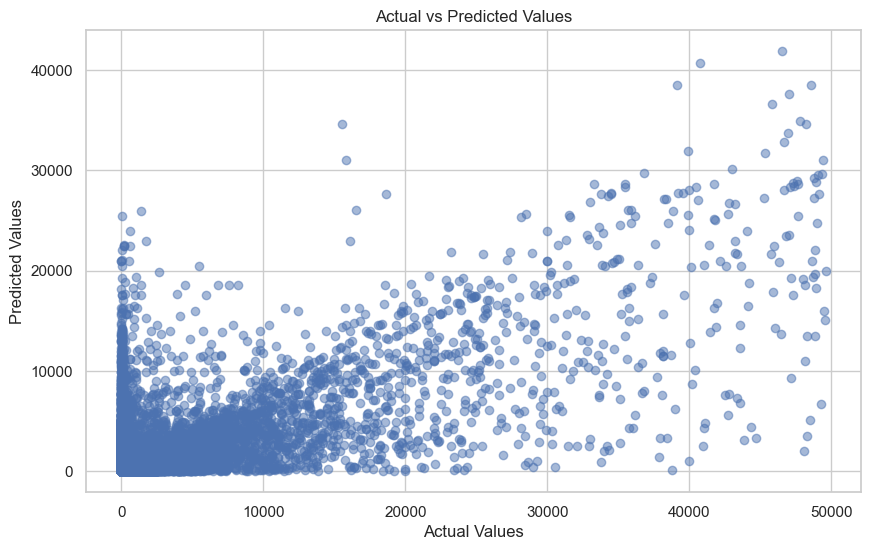

In [181]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### <center>FIRE DURATION PREDICTION</center>

In [182]:
model_data = new_fires_data.drop(['DISCOVERY_DATE','DISCOVERY_TIME','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','OWNER_CODE','FIPS_NAME'],axis=1)

model_data.columns

Index(['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW', 'DURATION_TIME_HRS',
       'DISCOVERY_AM_PM'],
      dtype='object')

In [183]:


model_data.drop('DISCOVERY_AM_PM',axis=1, inplace=True)

X = model_data.drop('DURATION_TIME_HRS', axis=1)
y = model_data['DURATION_TIME_HRS']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [185]:

model_data.dtypes


FIRE_YEAR              int64
STAT_CAUSE_DESCR      object
FIRE_SIZE            float64
OWNER_DESCR           object
STATE                 object
FIPS_CODE              int64
DISCOVERY_MONTH        int64
DISCOVERY_DOW          int64
DURATION_TIME_HRS    float64
dtype: object

In [186]:

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


In [187]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [188]:

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [189]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [190]:

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [191]:
from sklearn.metrics import mean_squared_error
import numpy as np
fire_duration_lr_rmse = mean_squared_error(model.predict(X_test),y_test)**(1/2)

In [192]:
fire_duration_lr_rmse

123.01864119179791

In [193]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [194]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'regressor__max_depth': [None, 3, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))
])

In [195]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))])

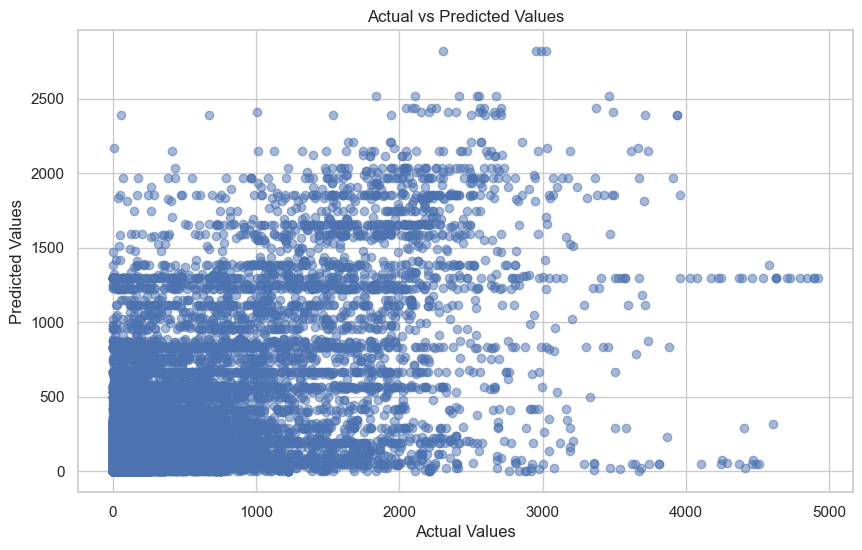

In [196]:
best_model = tree_pipeline

y_test

best_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [197]:
fire_duration_dt_rmse = mean_squared_error(tree_pipeline.predict(X_test),y_test)**(1/2)

In [198]:
fire_duration_dt_rmse

103.91821222846673

In [199]:
# Define a pipeline for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(max_depth=20, n_estimators=10))
])
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=10))])

In [200]:
best_model = forest_pipeline
y_test

293920      3.700000
639705      1.166667
569204      0.730952
307776      2.250000
854761      2.816667
             ...    
268227      0.833333
739915      0.000000
719246      0.000000
1002219    82.142789
328662      3.662121
Name: DURATION_TIME_HRS, Length: 199563, dtype: float64

In [201]:
best_model.predict(X_test)

array([2.57244988e+01, 2.66209509e+00, 3.08649924e+00, ...,
       9.65206187e-02, 5.02879060e+02, 2.27003294e+01])

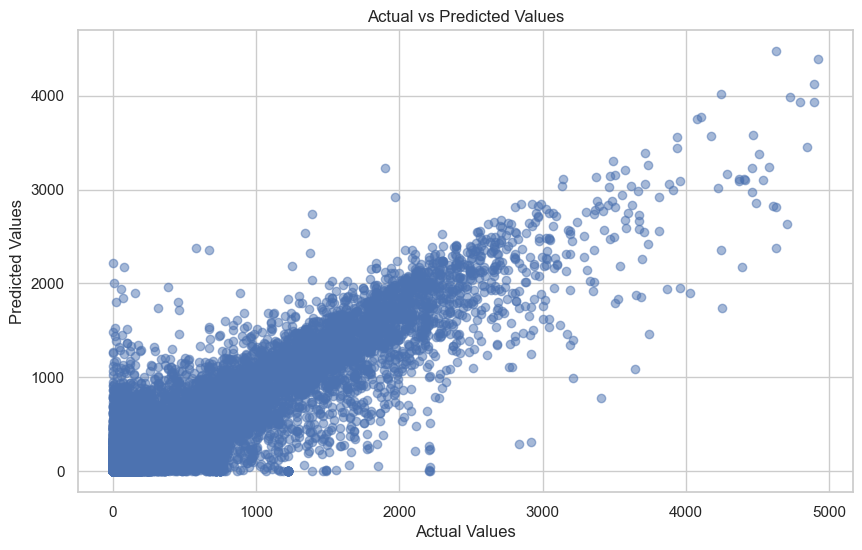

In [202]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [203]:
fire_duration_rf_rmse = mean_squared_error(best_model.predict(X_test), y_test)**(1/2)

In [204]:
fire_duration_rf_rmse

102.1111480310168

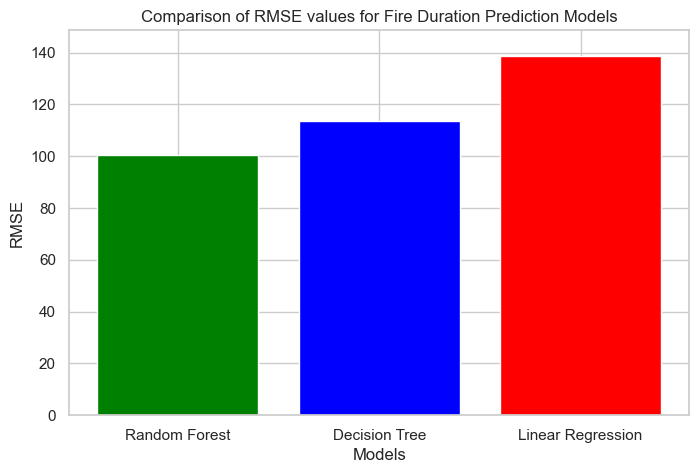

In [205]:

rmse_values = [100.53, 113.64, 138.60]
models = ['Random Forest', 'Decision Tree', 'Linear Regression']

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['green', 'blue', 'red'])
plt.title('Comparison of RMSE values for Fire Duration Prediction Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) + 10)  
plt.show()


### <center>FIRE CAUSE PREDICTION</center>

In [206]:
model_data = new_fires_data.drop(['DISCOVERY_DATE','DISCOVERY_TIME','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','OWNER_CODE','FIPS_NAME'],axis=1)

model_data.columns

Index(['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW', 'DURATION_TIME_HRS',
       'DISCOVERY_AM_PM'],
      dtype='object')

In [207]:
unique_values = model_data['STAT_CAUSE_DESCR'].unique()
mapping_dict = {category: index for index, category in enumerate(unique_values)}
model_data['STAT_CAUSE_DESCR'] = model_data['STAT_CAUSE_DESCR'].map(mapping_dict)

In [208]:
model_data.drop('DISCOVERY_AM_PM',axis=1, inplace=True)
X = model_data.drop(['STAT_CAUSE_DESCR'], axis=1)
y = model_data['STAT_CAUSE_DESCR']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=79)

In [209]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [210]:
X_train

FIRE_YEAR  FIRE_SIZE            OWNER_DESCR STATE  FIPS_CODE  \
114909        2000       2.00       STATE OR PRIVATE    AK        110   
699222        2008      40.00  MISSING/NOT SPECIFIED    KY        131   
452096        2000       1.00                PRIVATE    OR         61   
164835        1999      20.00                    BIA    AZ          1   
673824        2000       4.67                PRIVATE    GA        115   
...            ...        ...                    ...   ...        ...   
362823        1996       1.00  MISSING/NOT SPECIFIED    MN        137   
773214        1997       1.50                PRIVATE    GA        175   
361725        1994     109.00  MISSING/NOT SPECIFIED    MN         97   
82823         1996       0.30                   USFS    OR         23   
1009680       2015      69.00                    FWS    TX         39   

         DISCOVERY_MONTH  DISCOVERY_DOW  DURATION_TIME_HRS  
114909                 5              2           5.500000  
699222                 9              1          24.000000  
452096                 7              1          46.222222  
164835                 6              1           7.333333  
673824                 2              4           0.000000  
...                  ...            ...                ...  
362823                 4              1           4.948529  
773214                 7              5           1.633333  
361725                 4              2           6.154167  
82823                  8              0          23.116667  
1009680                2              5           4.750000  

[598687 rows x 8 columns]

In [211]:
y_train.unique()

array([ 2,  1,  0,  7,  5,  6,  4,  3,  8, 10,  9], dtype=int64)

In [212]:
categorical_cols

Index(['OWNER_DESCR', 'STATE'], dtype='object')

In [213]:
numerical_cols

Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW', 'DURATION_TIME_HRS'],
      dtype='object')

In [214]:
X_train

FIRE_YEAR  FIRE_SIZE            OWNER_DESCR STATE  FIPS_CODE  \
114909        2000       2.00       STATE OR PRIVATE    AK        110   
699222        2008      40.00  MISSING/NOT SPECIFIED    KY        131   
452096        2000       1.00                PRIVATE    OR         61   
164835        1999      20.00                    BIA    AZ          1   
673824        2000       4.67                PRIVATE    GA        115   
...            ...        ...                    ...   ...        ...   
362823        1996       1.00  MISSING/NOT SPECIFIED    MN        137   
773214        1997       1.50                PRIVATE    GA        175   
361725        1994     109.00  MISSING/NOT SPECIFIED    MN         97   
82823         1996       0.30                   USFS    OR         23   
1009680       2015      69.00                    FWS    TX         39   

         DISCOVERY_MONTH  DISCOVERY_DOW  DURATION_TIME_HRS  
114909                 5              2           5.500000  
699222                 9              1          24.000000  
452096                 7              1          46.222222  
164835                 6              1           7.333333  
673824                 2              4           0.000000  
...                  ...            ...                ...  
362823                 4              1           4.948529  
773214                 7              5           1.633333  
361725                 4              2           6.154167  
82823                  8              0          23.116667  
1009680                2              5           4.750000  

[598687 rows x 8 columns]

In [215]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])



categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [217]:
from sklearn.linear_model import LogisticRegression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fitting the model
log_reg_pipeline.fit(X_train, y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW', 'DURATION_TIME_HRS'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Assuming 'new_fires_data' is your DataFrame
# Dropping unnecessary columns
model_data = new_fires_data.drop(['DISCOVERY_AM_PM','DISCOVERY_DATE', 'DISCOVERY_TIME', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'FIPS_NAME'], axis=1)

# Mapping 'STAT_CAUSE_DESCR' to numerical values
unique_values = model_data['STAT_CAUSE_DESCR'].unique()
mapping_dict = {category: index for index, category in enumerate(unique_values)}
model_data['STAT_CAUSE_DESCR'] = model_data['STAT_CAUSE_DESCR'].map(mapping_dict)

# Splitting the data into features and target
X = model_data.drop('STAT_CAUSE_DESCR', axis=1)
y = model_data['STAT_CAUSE_DESCR']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=79)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a pipeline with a logistic regression model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fitting the model
log_reg_pipeline.fit(X_train, y_train)
'''

In [218]:
log_reg_pipeline.predict(X_test)

array([1, 0, 1, ..., 0, 1, 4], dtype=int64)

In [219]:
y_test

684058     1
547790     0
710292     4
326496     0
396864     1
          ..
561302     3
621558     5
1028300    1
187059     4
806718     2
Name: STAT_CAUSE_DESCR, Length: 199563, dtype: int64

In [220]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = log_reg_pipeline.predict(X_test)

In [221]:
cm = confusion_matrix(y_test, y_pred)

In [222]:
inverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

In [223]:
labels = [inverse_mapping_dict[i] for i in range(len(inverse_mapping_dict))]

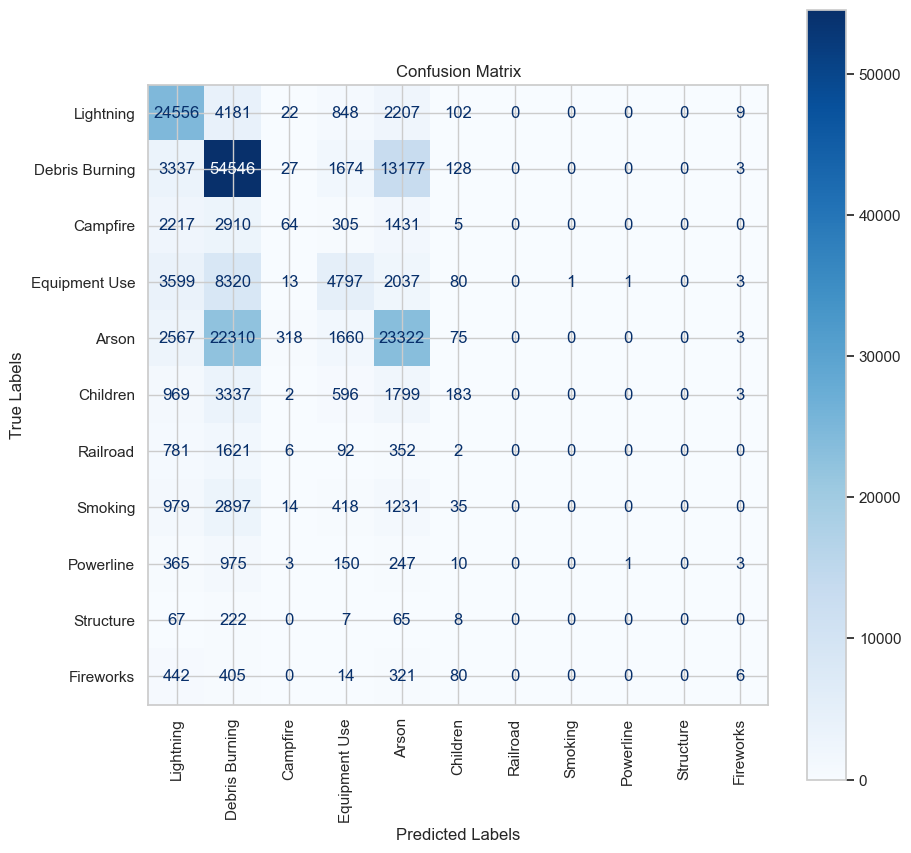

In [224]:

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(values_format='d', cmap='Blues', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels, rotation=90)
plt.show()


In [225]:
from sklearn.metrics import classification_report
print(classification_report(log_reg_pipeline.predict(X_test),y_test))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      0.62      0.68     39879
           1       0.75      0.54      0.62    101724
           2       0.01      0.14      0.02       469
           3       0.25      0.45      0.33     10561
           4       0.46      0.50      0.48     46189
           5       0.03      0.26      0.05       708
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.50      0.00         2
           9       0.00      0.00      0.00         0
          10       0.00      0.20      0.01        30

    accuracy                           0.54    199563
   macro avg       0.21      0.29      0.20    199563
weighted avg       0.66      0.54      0.58    199563



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
from sklearn.tree import DecisionTreeClassifier

In [227]:

model_data = new_fires_data.drop(['DISCOVERY_AM_PM','DISCOVERY_DATE', 'DISCOVERY_TIME', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'FIPS_NAME'], axis=1)


unique_values = model_data['STAT_CAUSE_DESCR'].unique()
mapping_dict = {category: index for index, category in enumerate(unique_values)}
model_data['STAT_CAUSE_DESCR'] = model_data['STAT_CAUSE_DESCR'].map(mapping_dict)

X = model_data.drop('STAT_CAUSE_DESCR', axis=1)
y = model_data['STAT_CAUSE_DESCR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=79)

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [228]:

dt_cls_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fitting the model
dt_cls_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW', 'DURATION_TIME_HRS'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

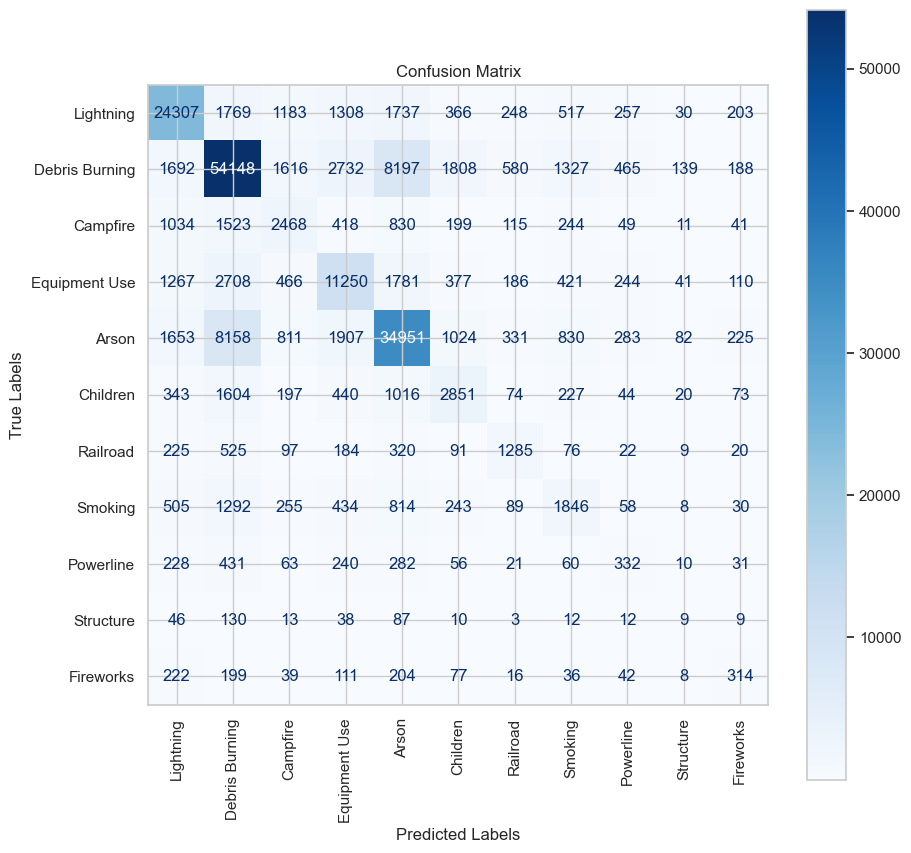

In [229]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = dt_cls_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

inverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

labels = [inverse_mapping_dict[i] for i in range(len(inverse_mapping_dict))]


fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(values_format='d', cmap='Blues', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels, rotation=90)
plt.show()


In [230]:
y_pred = dt_cls_pipeline.predict(X_test)

# Generating the classification report with the mapped labels
report = classification_report(y_test, y_pred, target_names=labels)

print(report)

                precision    recall  f1-score   support

     Lightning       0.77      0.76      0.77     31925
Debris Burning       0.75      0.74      0.74     72892
      Campfire       0.34      0.36      0.35      6932
 Equipment Use       0.59      0.60      0.59     18851
         Arson       0.70      0.70      0.70     50255
      Children       0.40      0.41      0.41      6889
      Railroad       0.44      0.45      0.44      2854
       Smoking       0.33      0.33      0.33      5574
     Powerline       0.18      0.19      0.19      1754
     Structure       0.02      0.02      0.02       369
     Fireworks       0.25      0.25      0.25      1268

      accuracy                           0.67    199563
     macro avg       0.43      0.44      0.44    199563
  weighted avg       0.67      0.67      0.67    199563



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cls_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10))
])

# Fitting the model
rf_cls_pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf_cls_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

inverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

labels = [inverse_mapping_dict[i] for i in range(len(inverse_mapping_dict))]


fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(values_format='d', cmap='Blues', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels, rotation=90)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(rf_cls_pipeline.predict(X_test),y_test))